In [86]:
import math, time, random, datetime

# data analysis and wrangling
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

In [87]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#import for interactive plotting
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

In [88]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler

In [178]:
# machine learning
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron,SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV, learning_curve, cross_val_score
from catboost import CatBoostClassifier, Pool, cv

In [90]:
# ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv("./Employee-Attrition.csv")

In [92]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [93]:
df.shape

(1470, 35)

In [94]:
# drop the unnecessary columns
df.drop(['EmployeeNumber','Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)

In [95]:
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == "Yes" else 0 )
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x =="Yes" else 0 )

In [96]:
attrition = df[df['Attrition'] == 1]
no_attrition = df[df['Attrition']==0]

In [97]:
def categorical_column_viz(col_name):
    
    f,ax = plt.subplots(1,2, figsize=(10,6))
  
    # Count Plot
    df[col_name].value_counts().plot.bar(cmap='Set2',ax=ax[0])
    ax[1].set_title(f'Number of Employee by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    
    # Attrition Count per factors
    sns.countplot(col_name, hue='Attrition',data=df, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Attrition by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')

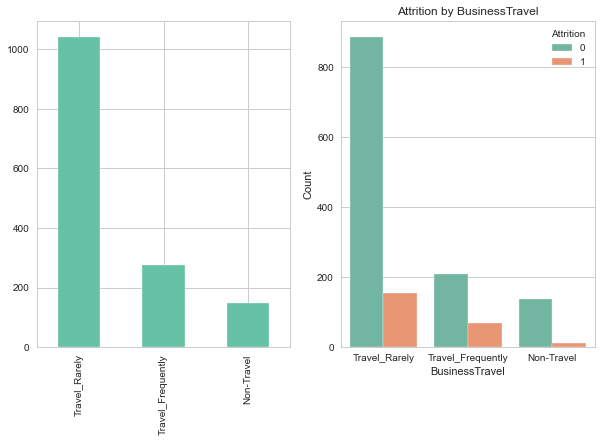

In [98]:
categorical_column_viz('BusinessTravel')

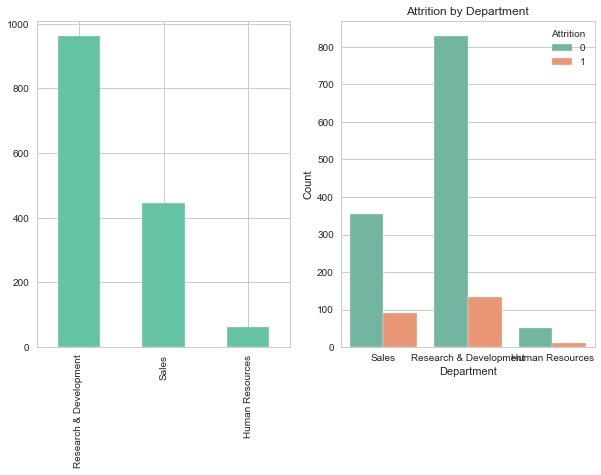

In [99]:
categorical_column_viz('Department')

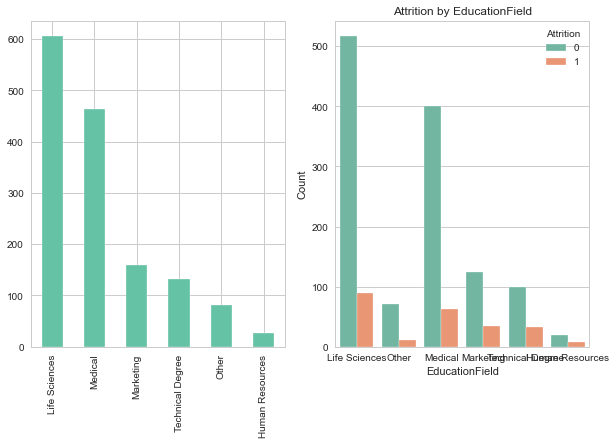

In [100]:
categorical_column_viz('EducationField')

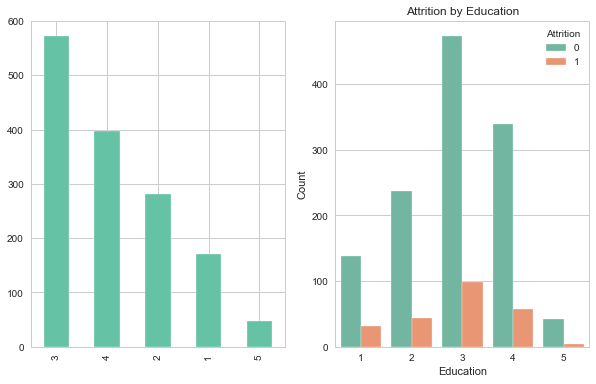

In [101]:
categorical_column_viz('Education')

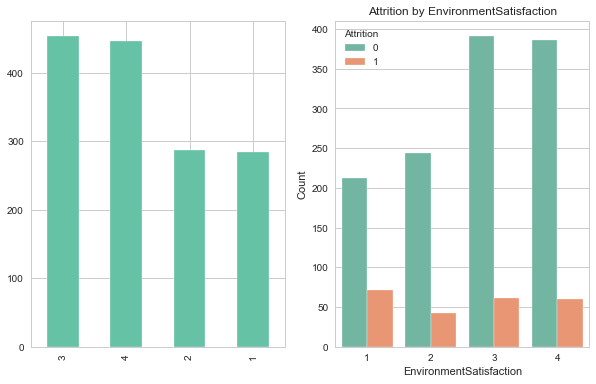

In [102]:
categorical_column_viz('EnvironmentSatisfaction')

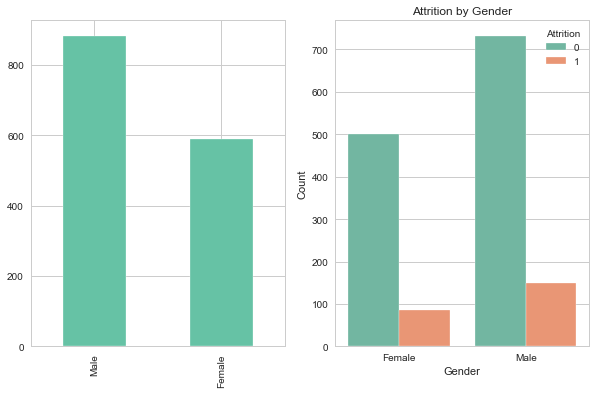

In [103]:
categorical_column_viz('Gender')

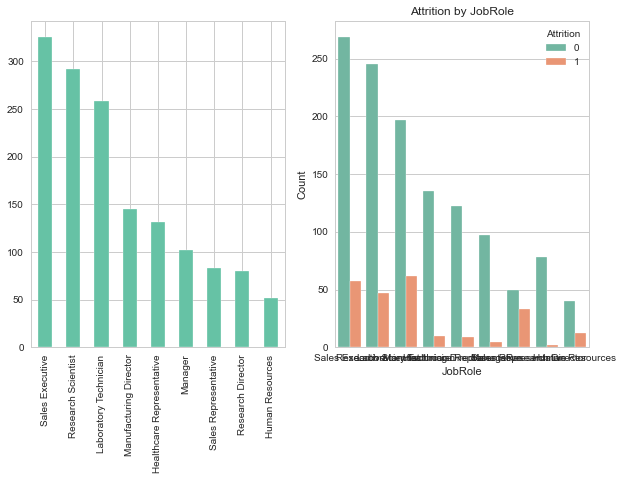

In [104]:
categorical_column_viz('JobRole')

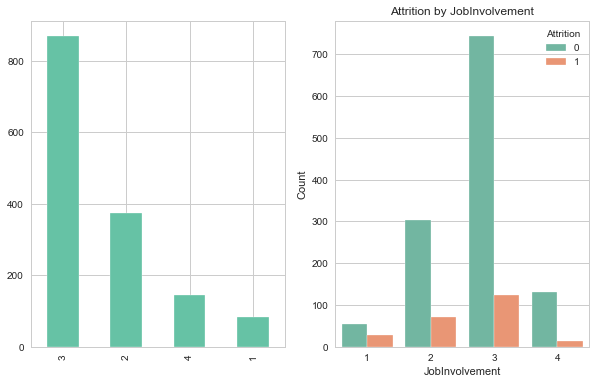

In [105]:
categorical_column_viz('JobInvolvement')

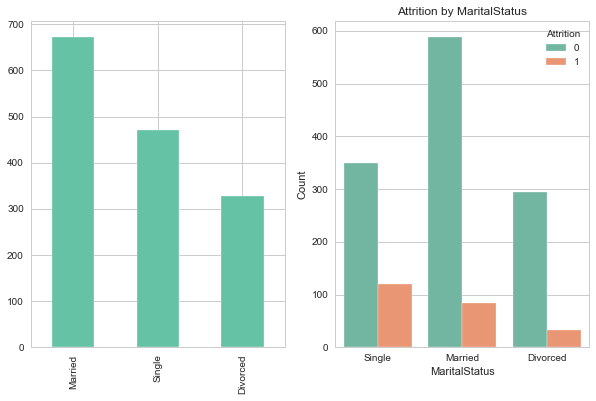

In [106]:
categorical_column_viz('MaritalStatus')

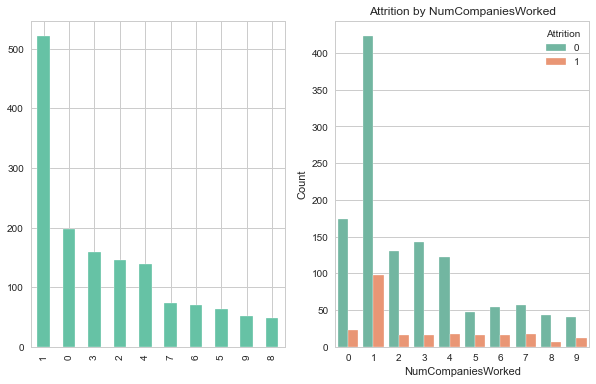

In [107]:
categorical_column_viz('NumCompaniesWorked')

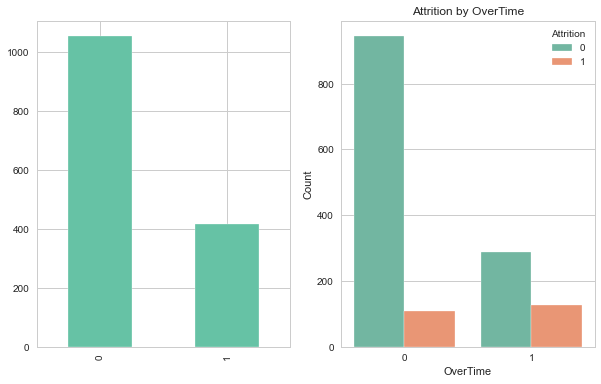

In [108]:
categorical_column_viz('OverTime')

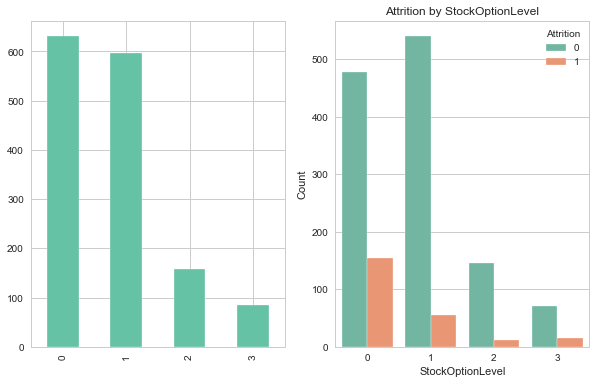

In [109]:
categorical_column_viz('StockOptionLevel')

In [110]:
categorical_column_viz('TrainingTimesLastYear')

In [111]:
categorical_column_viz('YearsWithCurrManager')

In [112]:
def numerical_column_viz(col_name):
    f,ax = plt.subplots(1,2, figsize=(18,6))
    sns.kdeplot(attrition[col_name], label='Employee who left',ax=ax[0], shade=True, color='palegreen')
    sns.kdeplot(no_attrition[col_name], label='Employee who stayed', ax=ax[0], shade=True, color='salmon')
    
    sns.boxplot(y=col_name, x='Attrition',data=df, palette='Set3', ax=ax[1])

In [113]:
numerical_column_viz("Age")

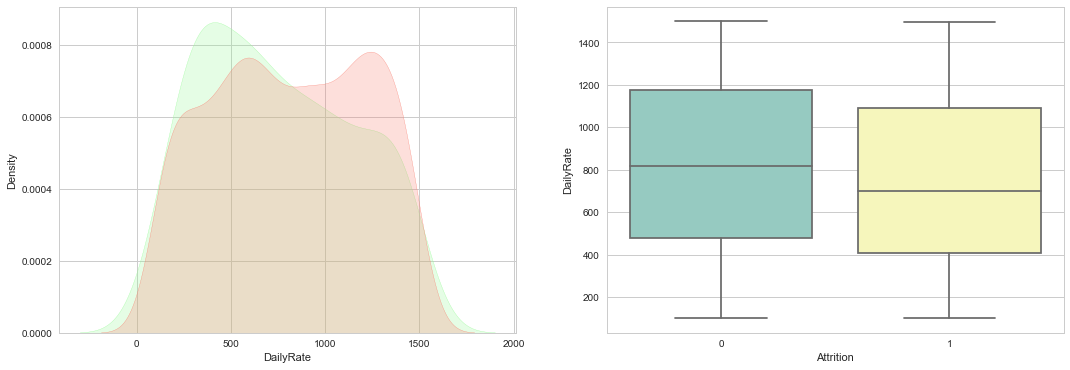

In [114]:
numerical_column_viz("DailyRate")

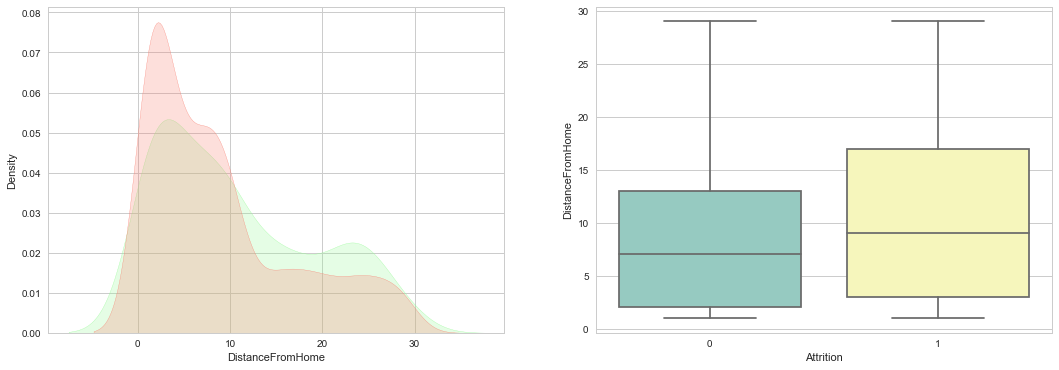

In [115]:
numerical_column_viz("DistanceFromHome")

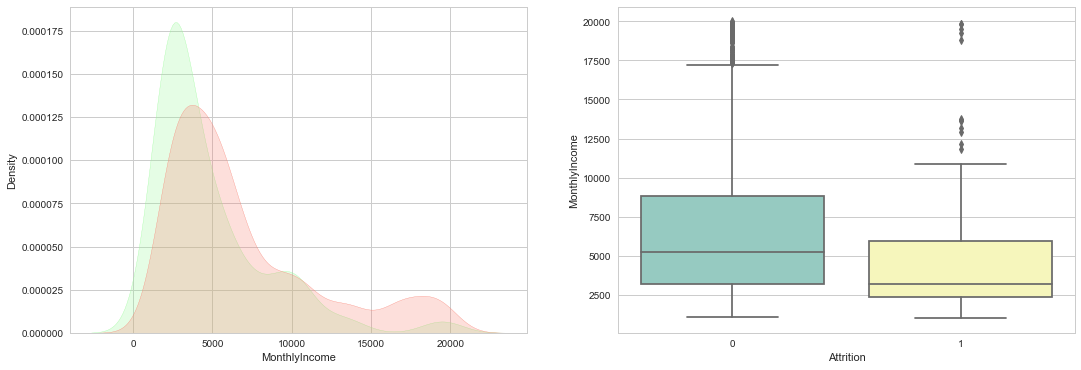

In [116]:
numerical_column_viz("MonthlyIncome")

In [117]:
numerical_column_viz("HourlyRate")

In [118]:
numerical_column_viz("JobInvolvement")

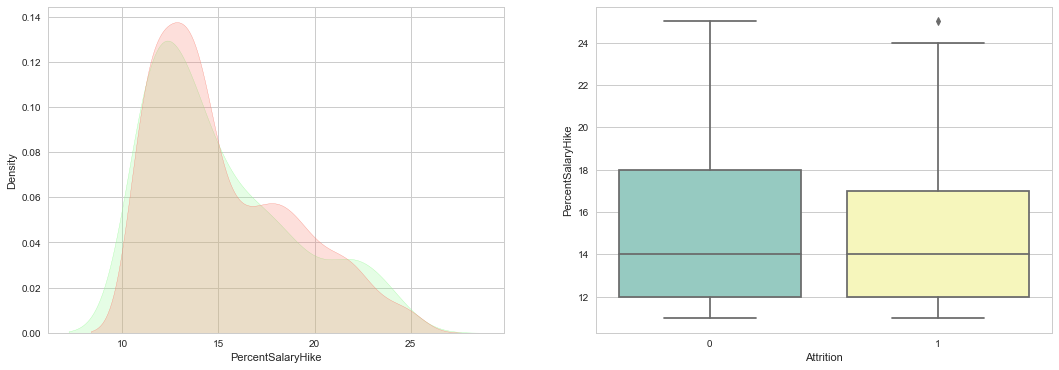

In [119]:
numerical_column_viz("PercentSalaryHike")

In [120]:
numerical_column_viz("Age")

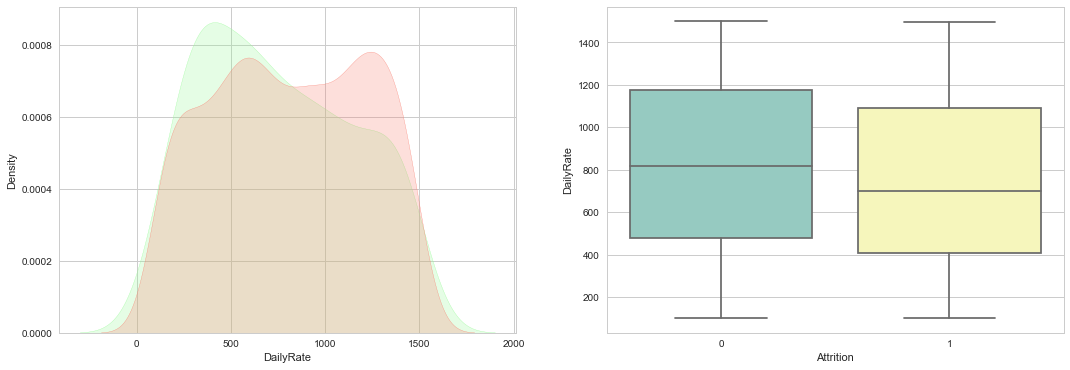

In [121]:
numerical_column_viz("DailyRate")

In [122]:
numerical_column_viz("TotalWorkingYears")

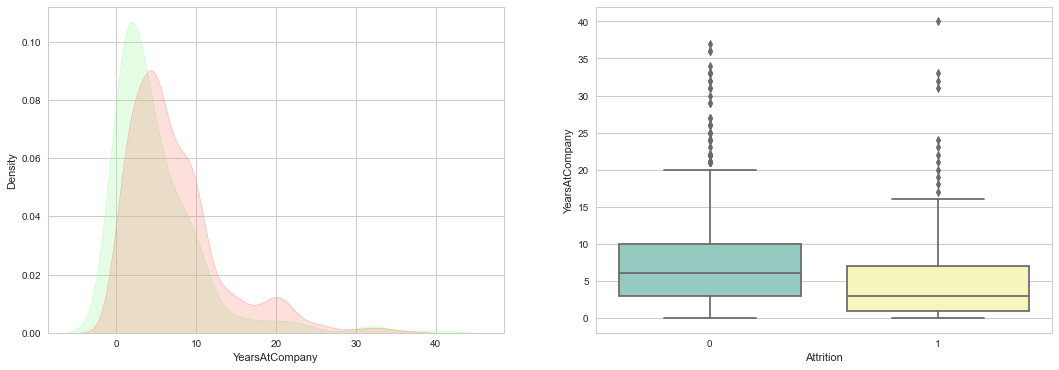

In [123]:
numerical_column_viz("YearsAtCompany")

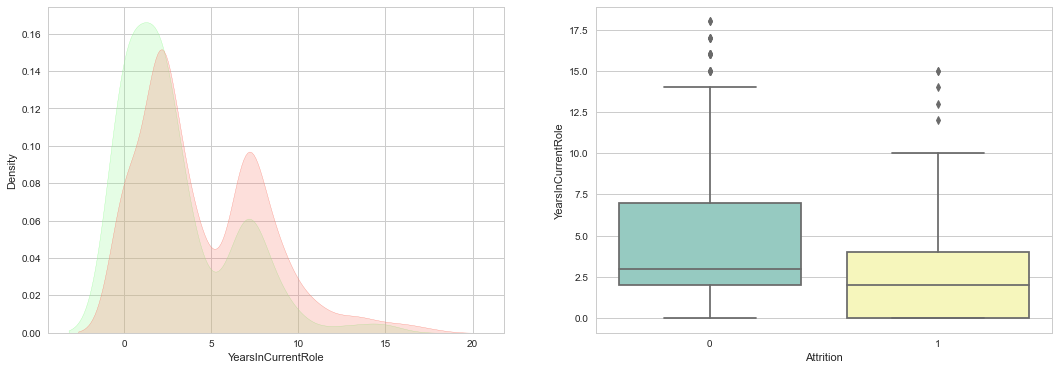

In [124]:
numerical_column_viz("YearsInCurrentRole")

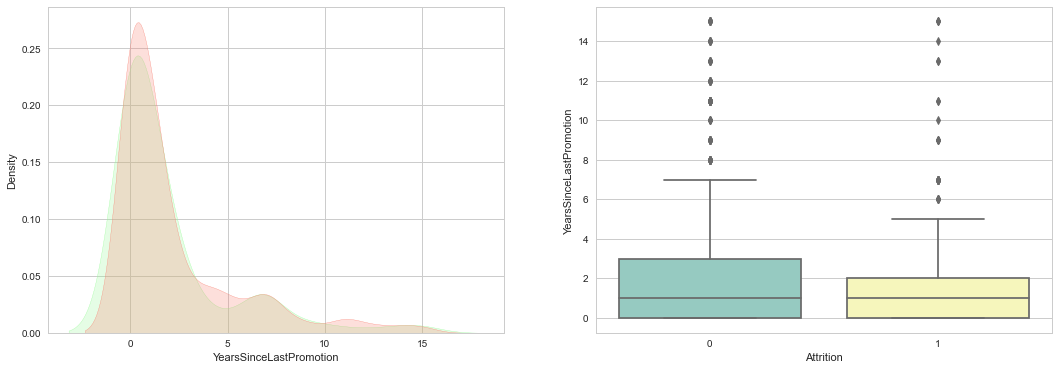

In [125]:
numerical_column_viz("YearsSinceLastPromotion")

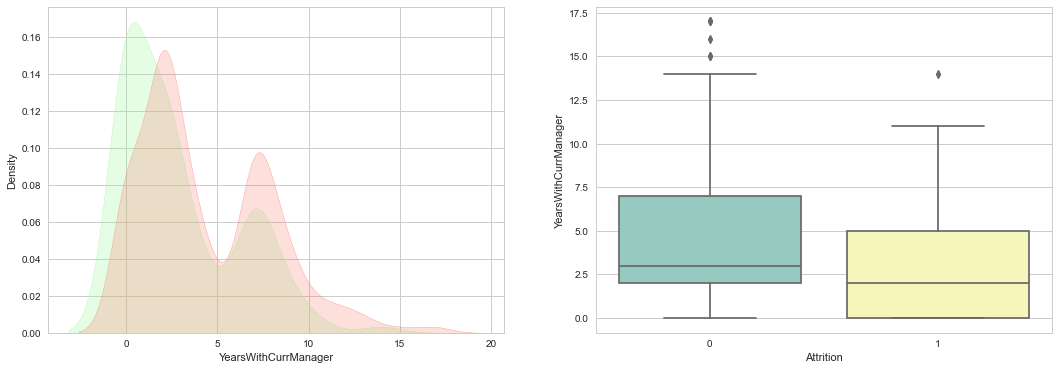

In [126]:
numerical_column_viz("YearsWithCurrManager")

In [127]:
def categorical_numerical(numerical_col, categorical_col1, categorical_col2):
    

    f,ax = plt.subplots(1,2, figsize=(20,8))
    
    g1= sns.swarmplot( categorical_col1, numerical_col,hue='Attrition', data=df, dodge=True, ax=ax[0], palette='Set2')
    ax[0].set_title(f'{numerical_col} vs {categorical_col1} separeted by Attrition')
    g1.set_xticklabels(g1.get_xticklabels(), rotation=90) 

    
    g2 = sns.swarmplot( categorical_col2, numerical_col,hue='Attrition', data=df, dodge=True, ax=ax[1], palette='Set2')
    ax[1].set_title(f'{numerical_col} vs {categorical_col1} separeted by Attrition')
    g2.set_xticklabels(g2.get_xticklabels(), rotation=90) 

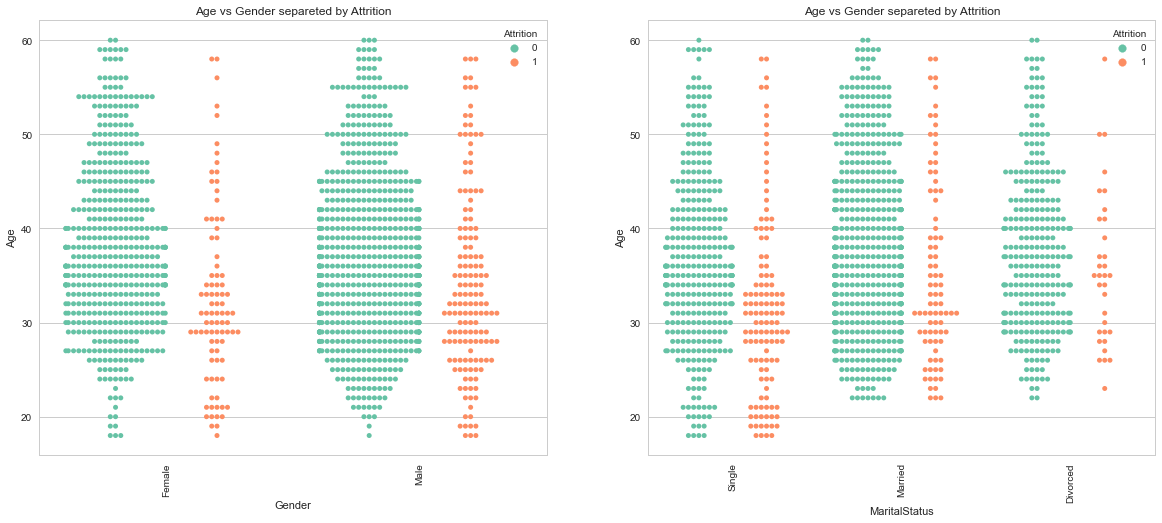

In [128]:
categorical_numerical('Age','Gender','MaritalStatus')

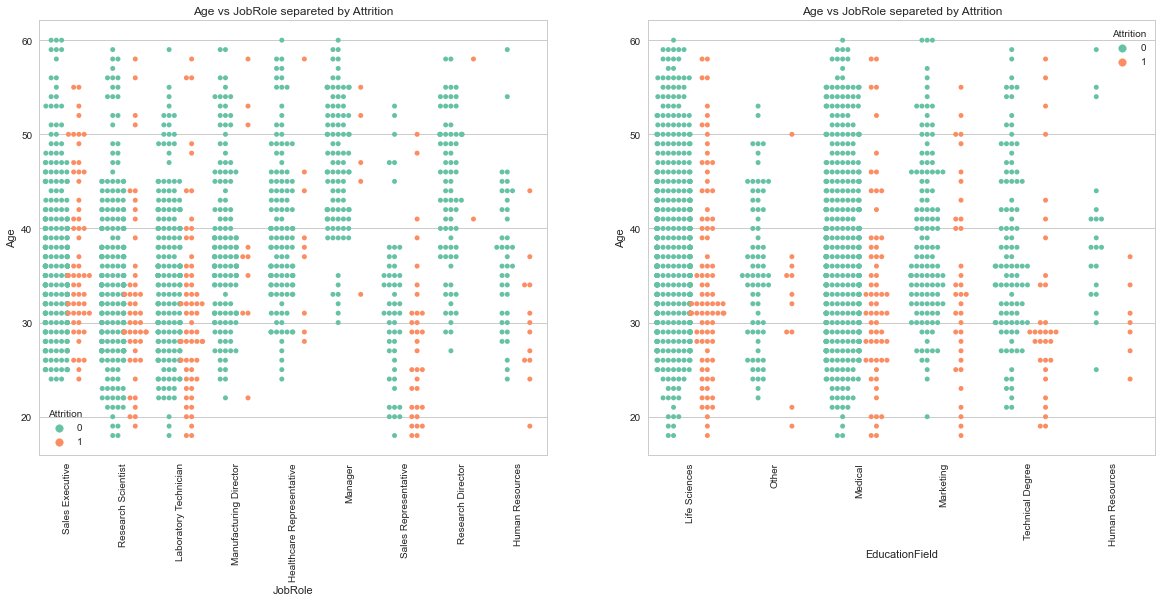

In [129]:
categorical_numerical('Age','JobRole','EducationField')

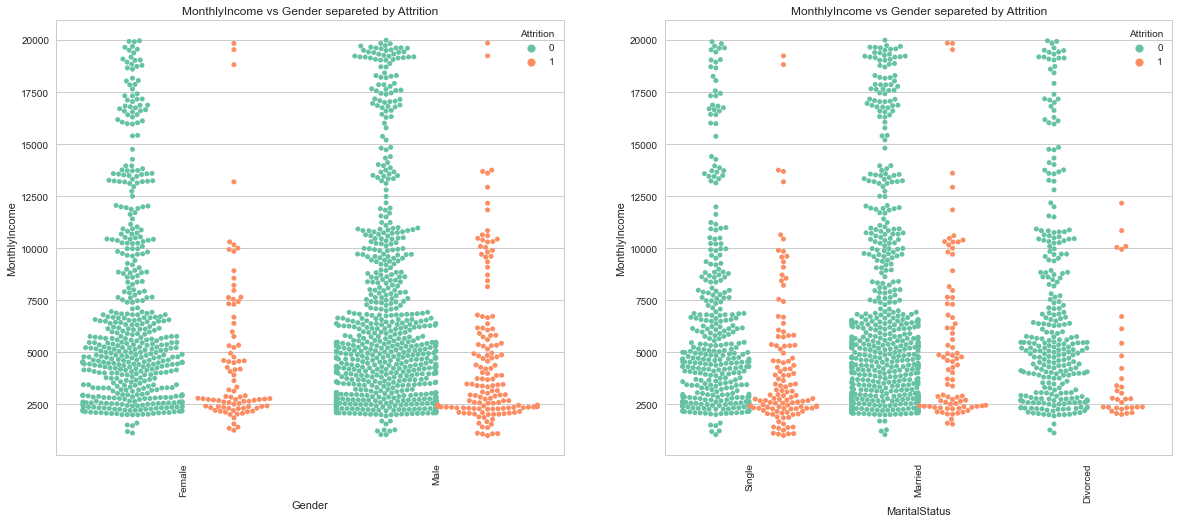

In [130]:
categorical_numerical('MonthlyIncome','Gender','MaritalStatus')

In [131]:
# 'EnviornmentSatisfaction', 'JobInvolvement', 'JobSatisfacction', 'RelationshipSatisfaction', 'WorklifeBalance' can be clubbed into a single feature 'TotalSatisfaction'

df['Total_Satisfaction'] = (df['EnvironmentSatisfaction'] + 
                            df['JobInvolvement'] + 
                            df['JobSatisfaction'] + 
                            df['RelationshipSatisfaction'] +
                            df['WorkLifeBalance']) /5 

# Drop Columns
df.drop(['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance'], axis=1, inplace=True)

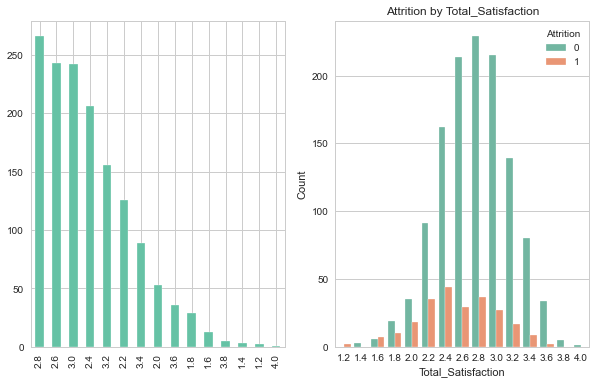

In [132]:
categorical_column_viz('Total_Satisfaction')

In [133]:
df.Total_Satisfaction.describe()

count    1470.000000
mean        2.730748
std         0.428551
min         1.200000
25%         2.400000
50%         2.800000
75%         3.000000
max         4.000000
Name: Total_Satisfaction, dtype: float64

In [134]:
# Convert Total satisfaction into boolean
# median = 2.8
# x = 1 if x >= 2.8

df['Total_Satisfaction_bool'] = df['Total_Satisfaction'].apply(lambda x:1 if x>=2.8 else 0 ) 
df.drop('Total_Satisfaction', axis=1, inplace=True)

In [135]:
# It can be observed that the rate of attrition of employees below age of 35 is high

df['Age_bool'] = df['Age'].apply(lambda x:1 if x<35 else 0)
df.drop('Age', axis=1, inplace=True)

In [136]:
# It can be observed that the employees are more likey the drop the job if dailtRate less than 800

df['DailyRate_bool'] = df['DailyRate'].apply(lambda x:1 if x<800 else 0)
df.drop('DailyRate', axis=1, inplace=True)

In [137]:
# Employees working at R&D Department have higher attrition rate

df['Department_bool'] = df['Department'].apply(lambda x:1 if x=='Research & Development' else 0)
df.drop('Department', axis=1, inplace=True)

In [138]:
# Rate of attrition of employees is high if DistanceFromHome > 10

df['DistanceFromHome_bool'] = df['DistanceFromHome'].apply(lambda x:1 if x>10 else 0)
df.drop('DistanceFromHome', axis=1, inplace=True)

In [139]:
# Employees are more likey to drop the job if the employee is working as Laboratory Technician

df['JobRole_bool'] = df['JobRole'].apply(lambda x:1 if x=='Laboratory Technician' else 0)
df.drop('JobRole', axis=1, inplace=True)

In [140]:
# Employees are more likey to the drop the job if the employee's hourly rate < 65

df['HourlyRate_bool'] = df['HourlyRate'].apply(lambda x:1 if x<65 else 0)
df.drop('HourlyRate', axis=1, inplace=True)

In [141]:
# Employees are more likey to the drop the job if the employee's MonthlyIncome < 4000

df['MonthlyIncome_bool'] = df['MonthlyIncome'].apply(lambda x:1 if x<4000 else 0)
df.drop('MonthlyIncome', axis=1, inplace=True)

In [142]:
# Rate of attrition of employees is high if NumCompaniesWorked < 3

df['NumCompaniesWorked_bool'] = df['NumCompaniesWorked'].apply(lambda x:1 if x>3 else 0)
df.drop('NumCompaniesWorked', axis=1, inplace=True)

In [143]:
# Employees are more likey to the drop the job if the employee's TotalWorkingYears < 8

df['TotalWorkingYears_bool'] = df['TotalWorkingYears'].apply(lambda x:1 if x<8 else 0)
df.drop('TotalWorkingYears', axis=1, inplace=True)

In [144]:
# Employees are more likey to the drop the job if the employee's YearsAtCompany < 3

df['YearsAtCompany_bool'] = df['YearsAtCompany'].apply(lambda x:1 if x<3 else 0)
df.drop('YearsAtCompany', axis=1, inplace=True)

In [145]:
# Employees are more likey to the drop the job if the employee's YearsInCurrentRole < 3

df['YearsInCurrentRole_bool'] = df['YearsInCurrentRole'].apply(lambda x:1 if x<3 else 0)
df.drop('YearsInCurrentRole', axis=1, inplace=True)

In [146]:
# Employees are more likey to the drop the job if the employee's YearsSinceLastPromotion < 1

df['YearsSinceLastPromotion_bool'] = df['YearsSinceLastPromotion'].apply(lambda x:1 if x<1 else 0)
df.drop('YearsSinceLastPromotion', axis=1, inplace=True)

In [147]:
# Employees are more likey to the drop the job if the employee's YearsWithCurrManager < 1

df['YearsWithCurrManager_bool'] = df['YearsWithCurrManager'].apply(lambda x:1 if x<1 else 0)
df.drop('YearsWithCurrManager', axis=1, inplace=True)

In [148]:
df['Gender'] = df['Gender'].apply(lambda x:1 if x=='Female' else 0)

In [149]:
df.drop('MonthlyRate', axis=1, inplace=True)
df.drop('PercentSalaryHike', axis=1, inplace=True)

In [150]:
convert_category = ['BusinessTravel','Education','EducationField','MaritalStatus','StockOptionLevel','OverTime','Gender','TrainingTimesLastYear']
for col in convert_category:
        df[col] = df[col].astype('category')

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Attrition                     1470 non-null   int64   
 1   BusinessTravel                1470 non-null   category
 2   Education                     1470 non-null   category
 3   EducationField                1470 non-null   category
 4   Gender                        1470 non-null   category
 5   JobLevel                      1470 non-null   int64   
 6   MaritalStatus                 1470 non-null   category
 7   OverTime                      1470 non-null   category
 8   PerformanceRating             1470 non-null   int64   
 9   StockOptionLevel              1470 non-null   category
 10  TrainingTimesLastYear         1470 non-null   category
 11  Total_Satisfaction_bool       1470 non-null   int64   
 12  Age_bool                      1470 non-null   in

In [152]:
#separate the categorical and numerical data
X_categorical = df.select_dtypes(include=['category'])
X_numerical = df.select_dtypes(include=['int64'])
X_numerical.drop('Attrition', axis=1, inplace=True)

In [153]:
y = df['Attrition']

In [154]:
# One HOt Encoding Categorical Features

onehotencoder = OneHotEncoder()

X_categorical = onehotencoder.fit_transform(X_categorical).toarray()
X_categorical = pd.DataFrame(X_categorical)
X_categorical

0    1    2    3    4    5    6    7    8    9   ...   22   23   24  \
0     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1     0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
4     0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1465  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
1466  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
1467  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
1468  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1469  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       25   26   27   28   29   30   31  
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  1.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  1.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  1.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  
1465  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
1466  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1467  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
1468  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
1469  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[1470 rows x 32 columns]

In [155]:
#concat the categorical and numerical values

X_all = pd.concat([X_categorical, X_numerical], axis=1)
X_all.head()

0    1    2    3    4    5    6    7    8    9  ...  \
0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
1  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...   
2  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   
3  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...   
4  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   DistanceFromHome_bool  JobRole_bool  HourlyRate_bool  MonthlyIncome_bool  \
0                      0             0                0                   0   
1                      0             0                1                   0   
2                      0             1                0                   1   
3                      0             0                1                   1   
4                      0             1                1                   1   

   NumCompaniesWorked_bool  TotalWorkingYears_bool  YearsAtCompany_bool  \
0                        1                       0                    0   
1                        0                       0                    0   
2                        1                       1                    1   
3                        0                       0                    0   
4                        1                       1                    1   

   YearsInCurrentRole_bool  YearsSinceLastPromotion_bool  \
0                        0                             1   
1                        0                             0   
2                        1                             1   
3                        0                             0   
4                        1                             0   

   YearsWithCurrManager_bool  
0                          0  
1                          0  
2                          1  
3                          1  
4                          0  

[5 rows x 48 columns]

In [156]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   0                             1470 non-null   float64
 1   1                             1470 non-null   float64
 2   2                             1470 non-null   float64
 3   3                             1470 non-null   float64
 4   4                             1470 non-null   float64
 5   5                             1470 non-null   float64
 6   6                             1470 non-null   float64
 7   7                             1470 non-null   float64
 8   8                             1470 non-null   float64
 9   9                             1470 non-null   float64
 10  10                            1470 non-null   float64
 11  11                            1470 non-null   float64
 12  12                            1470 non-null   float64
 13  13 

In [157]:
X_train,X_test, y_train, y_test = train_test_split(X_all,y, test_size=0.30)

In [158]:
print(f"Train data shape: {X_train.shape}, Test Data Shape {X_test.shape}")

Train data shape: (1029, 48), Test Data Shape (441, 48)


In [159]:
X_train.head()

0    1    2    3    4    5    6    7    8    9  ...  \
1049  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  ...   
259   0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   
1327  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   
717   0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   
670   0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...   

      DistanceFromHome_bool  JobRole_bool  HourlyRate_bool  \
1049                      1             0                0   
259                       1             1                0   
1327                      0             0                1   
717                       1             1                1   
670                       0             0                0   

      MonthlyIncome_bool  NumCompaniesWorked_bool  TotalWorkingYears_bool  \
1049                   0                        1                       1   
259                    1                        0                       1   
1327                   0                        0                       0   
717                    1                        1                       1   
670                    1                        0                       1   

      YearsAtCompany_bool  YearsInCurrentRole_bool  \
1049                    1                        1   
259                     0                        0   
1327                    0                        0   
717                     1                        1   
670                     1                        1   

      YearsSinceLastPromotion_bool  YearsWithCurrManager_bool  
1049                             0                          0  
259                              0                          0  
1327                             0                          0  
717                              0                          0  
670                              1                          1  

[5 rows x 48 columns]

In [160]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train,y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs = -1)
    
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [161]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), X_train,y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 90.86
Accuracy CV 10-Fold: 88.14
Running Time: 0:00:04.236478


In [162]:
# SVC
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(SVC(),X_train,y_train,10)
svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)
print("Running Time: %s" % datetime.timedelta(seconds=svc_time))

Accuracy: 88.82
Accuracy CV 10-Fold: 86.78
Running Time: 0:00:00.251418


In [163]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),X_train, y_train,10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 90.48
Accuracy CV 10-Fold: 88.34
Running Time: 0:00:00.209276


In [164]:
# K Nearest Neighbour
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3),X_train,y_train,10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 89.41
Accuracy CV 10-Fold: 85.33
Running Time: 0:00:00.187111


In [165]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(),X_train,y_train,10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 80.47
Accuracy CV 10-Fold: 78.23
Running Time: 0:00:00.062960


In [166]:
# Perceptron
start_time = time.time()
train_pred_gaussian, acc_perceptron, acc_cv_perceptron = fit_ml_algo(Perceptron(),X_train,y_train,10)
perceptron_time = (time.time() - start_time)
print("Accuracy: %s" % acc_perceptron)
print("Accuracy CV 10-Fold: %s" % acc_cv_perceptron)
print("Running Time: %s" % datetime.timedelta(seconds=perceptron_time))

Accuracy: 86.2
Accuracy CV 10-Fold: 82.12
Running Time: 0:00:00.053470


In [167]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(),X_train, y_train,10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 87.85
Accuracy CV 10-Fold: 86.1
Running Time: 0:00:00.078945


In [168]:
# Decision Tree
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(),X_train, y_train,10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 79.4
Running Time: 0:00:00.111930


In [169]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(),X_train, y_train,10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 94.17
Accuracy CV 10-Fold: 86.49
Running Time: 0:00:01.038451


In [170]:
# Random Forest
start_time = time.time()
train_pred_dt, acc_rf, acc_cv_rf = fit_ml_algo(RandomForestClassifier(n_estimators=100),X_train, y_train,10)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 86.88
Running Time: 0:00:01.050191


In [174]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
      dtype=int64)

In [180]:
# pool training data and categorical feature labels together
train_pool = Pool(X_train, y_train,cat_features)  

In [181]:
# CatBoost
catboost_model = CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.010429
0:	learn: 0.6835945	total: 169ms	remaining: 2m 49s
1:	learn: 0.6741486	total: 200ms	remaining: 1m 39s
2:	learn: 0.6663525	total: 215ms	remaining: 1m 11s
3:	learn: 0.6597655	total: 240ms	remaining: 59.9s
4:	learn: 0.6507797	total: 266ms	remaining: 52.9s
5:	learn: 0.6443397	total: 292ms	remaining: 48.3s
6:	learn: 0.6366139	total: 311ms	remaining: 44.2s
7:	learn: 0.6300951	total: 324ms	remaining: 40.2s
8:	learn: 0.6227579	total: 339ms	remaining: 37.3s
9:	learn: 0.6165678	total: 358ms	remaining: 35.4s
10:	learn: 0.6121194	total: 362ms	remaining: 32.5s
11:	learn: 0.6049944	total: 377ms	remaining: 31s
12:	learn: 0.6007221	total: 382ms	remaining: 29s
13:	learn: 0.5941889	total: 400ms	remaining: 28.2s
14:	learn: 0.5887527	total: 414ms	remaining: 27.2s
15:	learn: 0.5826971	total: 437ms	remaining: 26.9s
16:	learn: 0.5784268	total: 443ms	remaining: 25.6s
17:	learn: 0.5721677	total: 467ms	remaining: 25.5s
18:	learn: 0.5659459	total: 498ms	remaining: 25.7s
19:	learn: 0

168:	learn: 0.3037595	total: 3.31s	remaining: 16.3s
169:	learn: 0.3032427	total: 3.33s	remaining: 16.2s
170:	learn: 0.3032011	total: 3.33s	remaining: 16.1s
171:	learn: 0.3023108	total: 3.35s	remaining: 16.1s
172:	learn: 0.3017181	total: 3.37s	remaining: 16.1s
173:	learn: 0.3008432	total: 3.39s	remaining: 16.1s
174:	learn: 0.3002315	total: 3.42s	remaining: 16.1s
175:	learn: 0.2998755	total: 3.43s	remaining: 16.1s
176:	learn: 0.2997782	total: 3.44s	remaining: 16s
177:	learn: 0.2994065	total: 3.45s	remaining: 15.9s
178:	learn: 0.2988074	total: 3.47s	remaining: 15.9s
179:	learn: 0.2984180	total: 3.49s	remaining: 15.9s
180:	learn: 0.2978141	total: 3.51s	remaining: 15.9s
181:	learn: 0.2974508	total: 3.52s	remaining: 15.8s
182:	learn: 0.2967531	total: 3.55s	remaining: 15.9s
183:	learn: 0.2961213	total: 3.57s	remaining: 15.8s
184:	learn: 0.2955746	total: 3.6s	remaining: 15.8s
185:	learn: 0.2948054	total: 3.61s	remaining: 15.8s
186:	learn: 0.2942537	total: 3.63s	remaining: 15.8s
187:	learn: 0.2

336:	learn: 0.2344404	total: 6.68s	remaining: 13.1s
337:	learn: 0.2342512	total: 6.71s	remaining: 13.1s
338:	learn: 0.2336487	total: 6.72s	remaining: 13.1s
339:	learn: 0.2331692	total: 6.74s	remaining: 13.1s
340:	learn: 0.2326547	total: 6.75s	remaining: 13.1s
341:	learn: 0.2322660	total: 6.77s	remaining: 13s
342:	learn: 0.2318836	total: 6.8s	remaining: 13s
343:	learn: 0.2315715	total: 6.83s	remaining: 13s
344:	learn: 0.2314954	total: 6.85s	remaining: 13s
345:	learn: 0.2312224	total: 6.86s	remaining: 13s
346:	learn: 0.2308320	total: 6.88s	remaining: 12.9s
347:	learn: 0.2305162	total: 6.89s	remaining: 12.9s
348:	learn: 0.2303670	total: 6.91s	remaining: 12.9s
349:	learn: 0.2298736	total: 6.94s	remaining: 12.9s
350:	learn: 0.2295105	total: 6.96s	remaining: 12.9s
351:	learn: 0.2291951	total: 6.97s	remaining: 12.8s
352:	learn: 0.2289158	total: 6.99s	remaining: 12.8s
353:	learn: 0.2286462	total: 7s	remaining: 12.8s
354:	learn: 0.2283757	total: 7.02s	remaining: 12.8s
355:	learn: 0.2280828	tota

496:	learn: 0.1930381	total: 9.51s	remaining: 9.62s
497:	learn: 0.1928616	total: 9.52s	remaining: 9.6s
498:	learn: 0.1927701	total: 9.54s	remaining: 9.57s
499:	learn: 0.1924907	total: 9.55s	remaining: 9.55s
500:	learn: 0.1922326	total: 9.56s	remaining: 9.53s
501:	learn: 0.1919965	total: 9.58s	remaining: 9.5s
502:	learn: 0.1917360	total: 9.6s	remaining: 9.49s
503:	learn: 0.1915785	total: 9.62s	remaining: 9.46s
504:	learn: 0.1913584	total: 9.63s	remaining: 9.44s
505:	learn: 0.1912689	total: 9.65s	remaining: 9.42s
506:	learn: 0.1910061	total: 9.66s	remaining: 9.4s
507:	learn: 0.1907394	total: 9.68s	remaining: 9.37s
508:	learn: 0.1905278	total: 9.69s	remaining: 9.35s
509:	learn: 0.1902882	total: 9.71s	remaining: 9.33s
510:	learn: 0.1900566	total: 9.72s	remaining: 9.3s
511:	learn: 0.1898021	total: 9.74s	remaining: 9.28s
512:	learn: 0.1896713	total: 9.75s	remaining: 9.26s
513:	learn: 0.1894925	total: 9.77s	remaining: 9.24s
514:	learn: 0.1892933	total: 9.78s	remaining: 9.21s
515:	learn: 0.189

659:	learn: 0.1601394	total: 12.4s	remaining: 6.39s
660:	learn: 0.1598885	total: 12.4s	remaining: 6.37s
661:	learn: 0.1596697	total: 12.4s	remaining: 6.35s
662:	learn: 0.1595629	total: 12.4s	remaining: 6.33s
663:	learn: 0.1593866	total: 12.5s	remaining: 6.3s
664:	learn: 0.1592445	total: 12.5s	remaining: 6.28s
665:	learn: 0.1591365	total: 12.5s	remaining: 6.26s
666:	learn: 0.1589718	total: 12.5s	remaining: 6.24s
667:	learn: 0.1587444	total: 12.5s	remaining: 6.22s
668:	learn: 0.1586972	total: 12.5s	remaining: 6.2s
669:	learn: 0.1585439	total: 12.6s	remaining: 6.18s
670:	learn: 0.1583408	total: 12.6s	remaining: 6.16s
671:	learn: 0.1581238	total: 12.6s	remaining: 6.14s
672:	learn: 0.1580414	total: 12.6s	remaining: 6.12s
673:	learn: 0.1577937	total: 12.6s	remaining: 6.1s
674:	learn: 0.1576027	total: 12.6s	remaining: 6.08s
675:	learn: 0.1574058	total: 12.6s	remaining: 6.06s
676:	learn: 0.1572615	total: 12.7s	remaining: 6.04s
677:	learn: 0.1570412	total: 12.7s	remaining: 6.02s
678:	learn: 0.1

820:	learn: 0.1345864	total: 15.5s	remaining: 3.38s
821:	learn: 0.1343995	total: 15.5s	remaining: 3.37s
822:	learn: 0.1342605	total: 15.6s	remaining: 3.35s
823:	learn: 0.1340754	total: 15.6s	remaining: 3.33s
824:	learn: 0.1339399	total: 15.6s	remaining: 3.31s
825:	learn: 0.1337492	total: 15.6s	remaining: 3.29s
826:	learn: 0.1336192	total: 15.7s	remaining: 3.28s
827:	learn: 0.1334619	total: 15.7s	remaining: 3.26s
828:	learn: 0.1332664	total: 15.7s	remaining: 3.24s
829:	learn: 0.1330433	total: 15.7s	remaining: 3.23s
830:	learn: 0.1329785	total: 15.8s	remaining: 3.21s
831:	learn: 0.1328922	total: 15.8s	remaining: 3.19s
832:	learn: 0.1327558	total: 15.8s	remaining: 3.17s
833:	learn: 0.1325917	total: 15.8s	remaining: 3.15s
834:	learn: 0.1324155	total: 15.9s	remaining: 3.13s
835:	learn: 0.1322870	total: 15.9s	remaining: 3.11s
836:	learn: 0.1321229	total: 15.9s	remaining: 3.1s
837:	learn: 0.1318544	total: 15.9s	remaining: 3.08s
838:	learn: 0.1316971	total: 16s	remaining: 3.06s
839:	learn: 0.1

979:	learn: 0.1131315	total: 18.8s	remaining: 384ms
980:	learn: 0.1130163	total: 18.8s	remaining: 365ms
981:	learn: 0.1129551	total: 18.9s	remaining: 346ms
982:	learn: 0.1128092	total: 18.9s	remaining: 326ms
983:	learn: 0.1127682	total: 18.9s	remaining: 307ms
984:	learn: 0.1127381	total: 18.9s	remaining: 288ms
985:	learn: 0.1125951	total: 19s	remaining: 269ms
986:	learn: 0.1124451	total: 19s	remaining: 250ms
987:	learn: 0.1123605	total: 19s	remaining: 231ms
988:	learn: 0.1122938	total: 19s	remaining: 212ms
989:	learn: 0.1122386	total: 19s	remaining: 192ms
990:	learn: 0.1120998	total: 19s	remaining: 173ms
991:	learn: 0.1119564	total: 19.1s	remaining: 154ms
992:	learn: 0.1117476	total: 19.1s	remaining: 134ms
993:	learn: 0.1115345	total: 19.1s	remaining: 115ms
994:	learn: 0.1113323	total: 19.1s	remaining: 96ms
995:	learn: 0.1112367	total: 19.1s	remaining: 76.8ms
996:	learn: 0.1111088	total: 19.1s	remaining: 57.6ms
997:	learn: 0.1110361	total: 19.2s	remaining: 38.4ms
998:	learn: 0.1108616	

In [182]:
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# cross-validation
cv_data = cv(train_pool,cv_params,fold_count=10,plot=True)
catboost_time = (time.time() - start_time)

# Cross-validation accuracy metric
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]
0:	learn: 0.6682174	test: 0.6673022	best: 0.6673022 (0)	total: 18.9ms	remaining: 18.9s
1:	learn: 0.6471215	test: 0.6437527	best: 0.6437527 (1)	total: 39ms	remaining: 19.5s
2:	learn: 0.6264056	test: 0.6221003	best: 0.6221003 (2)	total: 60.9ms	remaining: 20.2s
3:	learn: 0.6115983	test: 0.6071248	best: 0.6071248 (3)	total: 91.1ms	remaining: 22.7s
4:	learn: 0.5938519	test: 0.5884683	best: 0.5884683 (4)	total: 116ms	remaining: 23.1s
5:	learn: 0.5772097	test: 0.5708020	best: 0.5708020 (5)	total: 140ms	remaining: 23.2s
6:	learn: 0.5610656	test: 0.5544153	best: 0.5544153 (6)	total: 164ms	remaining: 23.2s
7:	learn: 0.5464100	test: 0.5390485	best: 0.5390485 (7)	total: 225ms	remaining: 27.9s
8:	learn: 0.5375250	test: 0.5305038	best: 0.5305038 (8)	total: 236ms	remaining: 26s
9:	learn: 0.5241662	test: 0.5155561	best: 0.5155561 (9)	total: 278ms	remaining: 27.5s
10:	learn: 0.5127698	test: 0.5042718	best: 0.5042718 (10)	total: 317ms	remaining: 28.5s
11:	learn: 0.5009898	test: 0

99:	learn: 0.2429842	test: 0.2916407	best: 0.2905673 (92)	total: 2.65s	remaining: 23.8s
100:	learn: 0.2420235	test: 0.2911120	best: 0.2905673 (92)	total: 2.67s	remaining: 23.8s
101:	learn: 0.2411281	test: 0.2908010	best: 0.2905673 (92)	total: 2.7s	remaining: 23.8s
102:	learn: 0.2405638	test: 0.2909950	best: 0.2905673 (92)	total: 2.72s	remaining: 23.7s
103:	learn: 0.2395525	test: 0.2899579	best: 0.2899579 (103)	total: 2.73s	remaining: 23.6s
104:	learn: 0.2381017	test: 0.2901699	best: 0.2899579 (103)	total: 2.75s	remaining: 23.5s
105:	learn: 0.2369481	test: 0.2900480	best: 0.2899579 (103)	total: 2.78s	remaining: 23.5s
106:	learn: 0.2362712	test: 0.2899086	best: 0.2899086 (106)	total: 2.8s	remaining: 23.4s
107:	learn: 0.2354670	test: 0.2891919	best: 0.2891919 (107)	total: 2.82s	remaining: 23.3s
108:	learn: 0.2342102	test: 0.2892318	best: 0.2891919 (107)	total: 2.83s	remaining: 23.1s
109:	learn: 0.2335830	test: 0.2890814	best: 0.2890814 (109)	total: 2.85s	remaining: 23.1s
110:	learn: 0.232

196:	learn: 0.1718635	test: 0.2875915	best: 0.2859615 (179)	total: 4.97s	remaining: 20.3s
197:	learn: 0.1707949	test: 0.2877370	best: 0.2859615 (179)	total: 5.01s	remaining: 20.3s
198:	learn: 0.1703872	test: 0.2875869	best: 0.2859615 (179)	total: 5.03s	remaining: 20.2s
199:	learn: 0.1701519	test: 0.2875255	best: 0.2859615 (179)	total: 5.05s	remaining: 20.2s
200:	learn: 0.1698347	test: 0.2877314	best: 0.2859615 (179)	total: 5.07s	remaining: 20.1s
201:	learn: 0.1688181	test: 0.2868698	best: 0.2859615 (179)	total: 5.08s	remaining: 20.1s
202:	learn: 0.1681411	test: 0.2863723	best: 0.2859615 (179)	total: 5.12s	remaining: 20.1s
203:	learn: 0.1675296	test: 0.2867530	best: 0.2859615 (179)	total: 5.15s	remaining: 20.1s
204:	learn: 0.1667632	test: 0.2864891	best: 0.2859615 (179)	total: 5.16s	remaining: 20s
205:	learn: 0.1657884	test: 0.2867709	best: 0.2859615 (179)	total: 5.18s	remaining: 20s
206:	learn: 0.1649179	test: 0.2863518	best: 0.2859615 (179)	total: 5.2s	remaining: 19.9s
207:	learn: 0.1

292:	learn: 0.1239583	test: 0.2977020	best: 0.2859615 (179)	total: 7.27s	remaining: 17.6s
293:	learn: 0.1237735	test: 0.2977054	best: 0.2859615 (179)	total: 7.31s	remaining: 17.5s
294:	learn: 0.1234346	test: 0.2975494	best: 0.2859615 (179)	total: 7.34s	remaining: 17.5s
295:	learn: 0.1229504	test: 0.2978235	best: 0.2859615 (179)	total: 7.37s	remaining: 17.5s
296:	learn: 0.1227760	test: 0.2976539	best: 0.2859615 (179)	total: 7.39s	remaining: 17.5s
297:	learn: 0.1223906	test: 0.2983310	best: 0.2859615 (179)	total: 7.4s	remaining: 17.4s
298:	learn: 0.1221643	test: 0.2982003	best: 0.2859615 (179)	total: 7.42s	remaining: 17.4s
299:	learn: 0.1216892	test: 0.2986951	best: 0.2859615 (179)	total: 7.43s	remaining: 17.3s
300:	learn: 0.1210028	test: 0.2988857	best: 0.2859615 (179)	total: 7.45s	remaining: 17.3s
301:	learn: 0.1207679	test: 0.2990669	best: 0.2859615 (179)	total: 7.46s	remaining: 17.3s
302:	learn: 0.1203746	test: 0.2990859	best: 0.2859615 (179)	total: 7.48s	remaining: 17.2s
303:	learn:

387:	learn: 0.0930339	test: 0.3052650	best: 0.2859615 (179)	total: 9.12s	remaining: 14.4s
388:	learn: 0.0927668	test: 0.3054916	best: 0.2859615 (179)	total: 9.14s	remaining: 14.3s
389:	learn: 0.0926013	test: 0.3054748	best: 0.2859615 (179)	total: 9.17s	remaining: 14.3s
390:	learn: 0.0924489	test: 0.3053188	best: 0.2859615 (179)	total: 9.18s	remaining: 14.3s
391:	learn: 0.0922750	test: 0.3052715	best: 0.2859615 (179)	total: 9.2s	remaining: 14.3s
392:	learn: 0.0920825	test: 0.3052361	best: 0.2859615 (179)	total: 9.21s	remaining: 14.2s
393:	learn: 0.0916104	test: 0.3056695	best: 0.2859615 (179)	total: 9.23s	remaining: 14.2s
394:	learn: 0.0913851	test: 0.3059056	best: 0.2859615 (179)	total: 9.25s	remaining: 14.2s
395:	learn: 0.0912664	test: 0.3063240	best: 0.2859615 (179)	total: 9.27s	remaining: 14.1s
396:	learn: 0.0909206	test: 0.3067511	best: 0.2859615 (179)	total: 9.29s	remaining: 14.1s
397:	learn: 0.0905740	test: 0.3062534	best: 0.2859615 (179)	total: 9.3s	remaining: 14.1s
398:	learn: 

480:	learn: 0.0723694	test: 0.3218164	best: 0.2859615 (179)	total: 10.7s	remaining: 11.6s
481:	learn: 0.0721095	test: 0.3214710	best: 0.2859615 (179)	total: 10.8s	remaining: 11.6s
482:	learn: 0.0718569	test: 0.3206451	best: 0.2859615 (179)	total: 10.8s	remaining: 11.6s
483:	learn: 0.0716545	test: 0.3210286	best: 0.2859615 (179)	total: 10.8s	remaining: 11.5s
484:	learn: 0.0715954	test: 0.3213556	best: 0.2859615 (179)	total: 10.8s	remaining: 11.5s
485:	learn: 0.0714737	test: 0.3217234	best: 0.2859615 (179)	total: 10.9s	remaining: 11.5s
486:	learn: 0.0712849	test: 0.3220817	best: 0.2859615 (179)	total: 10.9s	remaining: 11.5s
487:	learn: 0.0710536	test: 0.3217999	best: 0.2859615 (179)	total: 10.9s	remaining: 11.4s
488:	learn: 0.0707687	test: 0.3220613	best: 0.2859615 (179)	total: 10.9s	remaining: 11.4s
489:	learn: 0.0705951	test: 0.3223781	best: 0.2859615 (179)	total: 10.9s	remaining: 11.4s
490:	learn: 0.0704765	test: 0.3224043	best: 0.2859615 (179)	total: 10.9s	remaining: 11.3s
491:	learn

583:	learn: 0.0550132	test: 0.3311484	best: 0.2859615 (179)	total: 12.6s	remaining: 8.96s
584:	learn: 0.0548370	test: 0.3309385	best: 0.2859615 (179)	total: 12.6s	remaining: 8.94s
585:	learn: 0.0546413	test: 0.3310902	best: 0.2859615 (179)	total: 12.6s	remaining: 8.91s
586:	learn: 0.0543969	test: 0.3306400	best: 0.2859615 (179)	total: 12.6s	remaining: 8.89s
587:	learn: 0.0542668	test: 0.3308378	best: 0.2859615 (179)	total: 12.6s	remaining: 8.86s
588:	learn: 0.0541962	test: 0.3309578	best: 0.2859615 (179)	total: 12.7s	remaining: 8.84s
589:	learn: 0.0540279	test: 0.3309815	best: 0.2859615 (179)	total: 12.7s	remaining: 8.81s
590:	learn: 0.0538953	test: 0.3316442	best: 0.2859615 (179)	total: 12.7s	remaining: 8.79s
591:	learn: 0.0537716	test: 0.3317938	best: 0.2859615 (179)	total: 12.7s	remaining: 8.76s
592:	learn: 0.0535866	test: 0.3315004	best: 0.2859615 (179)	total: 12.7s	remaining: 8.74s
593:	learn: 0.0535281	test: 0.3312111	best: 0.2859615 (179)	total: 12.7s	remaining: 8.71s
594:	learn

678:	learn: 0.0432364	test: 0.3381474	best: 0.2859615 (179)	total: 14.2s	remaining: 6.72s
679:	learn: 0.0431877	test: 0.3382273	best: 0.2859615 (179)	total: 14.3s	remaining: 6.72s
680:	learn: 0.0430871	test: 0.3385663	best: 0.2859615 (179)	total: 14.3s	remaining: 6.69s
681:	learn: 0.0429185	test: 0.3389344	best: 0.2859615 (179)	total: 14.3s	remaining: 6.67s
682:	learn: 0.0428829	test: 0.3389244	best: 0.2859615 (179)	total: 14.3s	remaining: 6.66s
683:	learn: 0.0427641	test: 0.3387454	best: 0.2859615 (179)	total: 14.4s	remaining: 6.63s
684:	learn: 0.0426416	test: 0.3387975	best: 0.2859615 (179)	total: 14.4s	remaining: 6.61s
685:	learn: 0.0425488	test: 0.3390464	best: 0.2859615 (179)	total: 14.4s	remaining: 6.59s
686:	learn: 0.0424681	test: 0.3388551	best: 0.2859615 (179)	total: 14.4s	remaining: 6.57s
687:	learn: 0.0423820	test: 0.3391408	best: 0.2859615 (179)	total: 14.4s	remaining: 6.55s
688:	learn: 0.0422846	test: 0.3391928	best: 0.2859615 (179)	total: 14.5s	remaining: 6.53s
689:	learn

779:	learn: 0.0352086	test: 0.3475418	best: 0.2859615 (179)	total: 16.1s	remaining: 4.53s
780:	learn: 0.0351646	test: 0.3478119	best: 0.2859615 (179)	total: 16.1s	remaining: 4.51s
781:	learn: 0.0351145	test: 0.3480275	best: 0.2859615 (179)	total: 16.1s	remaining: 4.49s
782:	learn: 0.0350895	test: 0.3481571	best: 0.2859615 (179)	total: 16.1s	remaining: 4.47s
783:	learn: 0.0350615	test: 0.3480526	best: 0.2859615 (179)	total: 16.1s	remaining: 4.45s
784:	learn: 0.0350376	test: 0.3481800	best: 0.2859615 (179)	total: 16.2s	remaining: 4.43s
785:	learn: 0.0349324	test: 0.3479400	best: 0.2859615 (179)	total: 16.2s	remaining: 4.41s
786:	learn: 0.0348545	test: 0.3478163	best: 0.2859615 (179)	total: 16.2s	remaining: 4.38s
787:	learn: 0.0347501	test: 0.3482654	best: 0.2859615 (179)	total: 16.2s	remaining: 4.36s
788:	learn: 0.0346892	test: 0.3481316	best: 0.2859615 (179)	total: 16.2s	remaining: 4.34s
789:	learn: 0.0346719	test: 0.3481023	best: 0.2859615 (179)	total: 16.2s	remaining: 4.32s
790:	learn

879:	learn: 0.0286113	test: 0.3546089	best: 0.2859615 (179)	total: 17.9s	remaining: 2.44s
880:	learn: 0.0285738	test: 0.3546029	best: 0.2859615 (179)	total: 17.9s	remaining: 2.42s
881:	learn: 0.0284973	test: 0.3543271	best: 0.2859615 (179)	total: 17.9s	remaining: 2.4s
882:	learn: 0.0284759	test: 0.3544001	best: 0.2859615 (179)	total: 17.9s	remaining: 2.38s
883:	learn: 0.0284126	test: 0.3546384	best: 0.2859615 (179)	total: 18s	remaining: 2.36s
884:	learn: 0.0283737	test: 0.3545163	best: 0.2859615 (179)	total: 18s	remaining: 2.33s
885:	learn: 0.0283481	test: 0.3547011	best: 0.2859615 (179)	total: 18s	remaining: 2.31s
886:	learn: 0.0282708	test: 0.3550899	best: 0.2859615 (179)	total: 18s	remaining: 2.29s
887:	learn: 0.0282219	test: 0.3551308	best: 0.2859615 (179)	total: 18s	remaining: 2.27s
888:	learn: 0.0281614	test: 0.3551649	best: 0.2859615 (179)	total: 18.1s	remaining: 2.25s
889:	learn: 0.0281035	test: 0.3550881	best: 0.2859615 (179)	total: 18.1s	remaining: 2.23s
890:	learn: 0.0280657

975:	learn: 0.0244008	test: 0.3601757	best: 0.2859615 (179)	total: 19.7s	remaining: 485ms
976:	learn: 0.0243526	test: 0.3600074	best: 0.2859615 (179)	total: 19.7s	remaining: 465ms
977:	learn: 0.0243307	test: 0.3601537	best: 0.2859615 (179)	total: 19.8s	remaining: 445ms
978:	learn: 0.0242972	test: 0.3603675	best: 0.2859615 (179)	total: 19.8s	remaining: 424ms
979:	learn: 0.0242502	test: 0.3603922	best: 0.2859615 (179)	total: 19.8s	remaining: 404ms
980:	learn: 0.0242418	test: 0.3604670	best: 0.2859615 (179)	total: 19.8s	remaining: 384ms
981:	learn: 0.0242087	test: 0.3605352	best: 0.2859615 (179)	total: 19.8s	remaining: 363ms
982:	learn: 0.0241600	test: 0.3607397	best: 0.2859615 (179)	total: 19.8s	remaining: 343ms
983:	learn: 0.0241283	test: 0.3609512	best: 0.2859615 (179)	total: 19.9s	remaining: 323ms
984:	learn: 0.0240665	test: 0.3608489	best: 0.2859615 (179)	total: 19.9s	remaining: 303ms
985:	learn: 0.0240308	test: 0.3604252	best: 0.2859615 (179)	total: 19.9s	remaining: 283ms
986:	learn

70:	learn: 0.2698424	test: 0.3630734	best: 0.3630734 (70)	total: 1.54s	remaining: 20.2s
71:	learn: 0.2685606	test: 0.3622986	best: 0.3622986 (71)	total: 1.55s	remaining: 20s
72:	learn: 0.2673397	test: 0.3626798	best: 0.3622986 (71)	total: 1.57s	remaining: 20s
73:	learn: 0.2660203	test: 0.3614746	best: 0.3614746 (73)	total: 1.59s	remaining: 19.9s
74:	learn: 0.2649870	test: 0.3609452	best: 0.3609452 (74)	total: 1.6s	remaining: 19.8s
75:	learn: 0.2635924	test: 0.3602426	best: 0.3602426 (75)	total: 1.62s	remaining: 19.7s
76:	learn: 0.2624666	test: 0.3598943	best: 0.3598943 (76)	total: 1.65s	remaining: 19.8s
77:	learn: 0.2605464	test: 0.3587993	best: 0.3587993 (77)	total: 1.66s	remaining: 19.7s
78:	learn: 0.2593815	test: 0.3594039	best: 0.3587993 (77)	total: 1.68s	remaining: 19.6s
79:	learn: 0.2581919	test: 0.3596449	best: 0.3587993 (77)	total: 1.69s	remaining: 19.5s
80:	learn: 0.2566747	test: 0.3610219	best: 0.3587993 (77)	total: 1.71s	remaining: 19.4s
81:	learn: 0.2555331	test: 0.3616443	

172:	learn: 0.1820686	test: 0.3582332	best: 0.3555481 (124)	total: 3.38s	remaining: 16.2s
173:	learn: 0.1817634	test: 0.3579801	best: 0.3555481 (124)	total: 3.4s	remaining: 16.2s
174:	learn: 0.1809975	test: 0.3580343	best: 0.3555481 (124)	total: 3.42s	remaining: 16.1s
175:	learn: 0.1804971	test: 0.3574585	best: 0.3555481 (124)	total: 3.44s	remaining: 16.1s
176:	learn: 0.1799335	test: 0.3573649	best: 0.3555481 (124)	total: 3.45s	remaining: 16s
177:	learn: 0.1792457	test: 0.3572797	best: 0.3555481 (124)	total: 3.47s	remaining: 16s
178:	learn: 0.1790802	test: 0.3572920	best: 0.3555481 (124)	total: 3.49s	remaining: 16s
179:	learn: 0.1779965	test: 0.3572667	best: 0.3555481 (124)	total: 3.5s	remaining: 16s
180:	learn: 0.1772997	test: 0.3566676	best: 0.3555481 (124)	total: 3.52s	remaining: 15.9s
181:	learn: 0.1765897	test: 0.3570718	best: 0.3555481 (124)	total: 3.53s	remaining: 15.9s
182:	learn: 0.1760170	test: 0.3565933	best: 0.3555481 (124)	total: 3.55s	remaining: 15.9s
183:	learn: 0.175502

269:	learn: 0.1267736	test: 0.3610064	best: 0.3552018 (238)	total: 5.29s	remaining: 14.3s
270:	learn: 0.1265598	test: 0.3609598	best: 0.3552018 (238)	total: 5.31s	remaining: 14.3s
271:	learn: 0.1260134	test: 0.3613316	best: 0.3552018 (238)	total: 5.32s	remaining: 14.2s
272:	learn: 0.1258705	test: 0.3612245	best: 0.3552018 (238)	total: 5.34s	remaining: 14.2s
273:	learn: 0.1254484	test: 0.3610775	best: 0.3552018 (238)	total: 5.35s	remaining: 14.2s
274:	learn: 0.1249862	test: 0.3609179	best: 0.3552018 (238)	total: 5.37s	remaining: 14.2s
275:	learn: 0.1246199	test: 0.3613341	best: 0.3552018 (238)	total: 5.38s	remaining: 14.1s
276:	learn: 0.1241778	test: 0.3613309	best: 0.3552018 (238)	total: 5.4s	remaining: 14.1s
277:	learn: 0.1238165	test: 0.3619213	best: 0.3552018 (238)	total: 5.42s	remaining: 14.1s
278:	learn: 0.1234019	test: 0.3624087	best: 0.3552018 (238)	total: 5.43s	remaining: 14s
279:	learn: 0.1230149	test: 0.3625728	best: 0.3552018 (238)	total: 5.45s	remaining: 14s
280:	learn: 0.1

365:	learn: 0.0942433	test: 0.3740965	best: 0.3552018 (238)	total: 7.05s	remaining: 12.2s
366:	learn: 0.0938997	test: 0.3744437	best: 0.3552018 (238)	total: 7.06s	remaining: 12.2s
367:	learn: 0.0935315	test: 0.3747384	best: 0.3552018 (238)	total: 7.08s	remaining: 12.2s
368:	learn: 0.0932554	test: 0.3748570	best: 0.3552018 (238)	total: 7.09s	remaining: 12.1s
369:	learn: 0.0928580	test: 0.3740506	best: 0.3552018 (238)	total: 7.11s	remaining: 12.1s
370:	learn: 0.0926826	test: 0.3740358	best: 0.3552018 (238)	total: 7.13s	remaining: 12.1s
371:	learn: 0.0923753	test: 0.3740739	best: 0.3552018 (238)	total: 7.14s	remaining: 12.1s
372:	learn: 0.0920365	test: 0.3741964	best: 0.3552018 (238)	total: 7.16s	remaining: 12s
373:	learn: 0.0918307	test: 0.3742610	best: 0.3552018 (238)	total: 7.17s	remaining: 12s
374:	learn: 0.0915811	test: 0.3744410	best: 0.3552018 (238)	total: 7.19s	remaining: 12s
375:	learn: 0.0912803	test: 0.3743709	best: 0.3552018 (238)	total: 7.2s	remaining: 12s
376:	learn: 0.09110

467:	learn: 0.0684620	test: 0.3896241	best: 0.3552018 (238)	total: 8.73s	remaining: 9.93s
468:	learn: 0.0682912	test: 0.3898887	best: 0.3552018 (238)	total: 8.75s	remaining: 9.9s
469:	learn: 0.0680579	test: 0.3899744	best: 0.3552018 (238)	total: 8.76s	remaining: 9.88s
470:	learn: 0.0678277	test: 0.3902797	best: 0.3552018 (238)	total: 8.78s	remaining: 9.86s
471:	learn: 0.0675263	test: 0.3907252	best: 0.3552018 (238)	total: 8.79s	remaining: 9.84s
472:	learn: 0.0673939	test: 0.3905498	best: 0.3552018 (238)	total: 8.81s	remaining: 9.81s
473:	learn: 0.0670904	test: 0.3900439	best: 0.3552018 (238)	total: 8.82s	remaining: 9.79s
474:	learn: 0.0669073	test: 0.3901411	best: 0.3552018 (238)	total: 8.84s	remaining: 9.77s
475:	learn: 0.0666433	test: 0.3899135	best: 0.3552018 (238)	total: 8.86s	remaining: 9.75s
476:	learn: 0.0665890	test: 0.3900038	best: 0.3552018 (238)	total: 8.89s	remaining: 9.74s
477:	learn: 0.0664264	test: 0.3904290	best: 0.3552018 (238)	total: 8.92s	remaining: 9.74s
478:	learn:

561:	learn: 0.0525945	test: 0.4032727	best: 0.3552018 (238)	total: 10.6s	remaining: 8.27s
562:	learn: 0.0525222	test: 0.4037656	best: 0.3552018 (238)	total: 10.6s	remaining: 8.25s
563:	learn: 0.0524251	test: 0.4044280	best: 0.3552018 (238)	total: 10.6s	remaining: 8.23s
564:	learn: 0.0523739	test: 0.4044078	best: 0.3552018 (238)	total: 10.7s	remaining: 8.21s
565:	learn: 0.0522059	test: 0.4040899	best: 0.3552018 (238)	total: 10.7s	remaining: 8.19s
566:	learn: 0.0519889	test: 0.4049341	best: 0.3552018 (238)	total: 10.7s	remaining: 8.16s
567:	learn: 0.0519153	test: 0.4051981	best: 0.3552018 (238)	total: 10.7s	remaining: 8.14s
568:	learn: 0.0517844	test: 0.4054454	best: 0.3552018 (238)	total: 10.7s	remaining: 8.13s
569:	learn: 0.0517109	test: 0.4055328	best: 0.3552018 (238)	total: 10.8s	remaining: 8.11s
570:	learn: 0.0515540	test: 0.4056922	best: 0.3552018 (238)	total: 10.8s	remaining: 8.09s
571:	learn: 0.0514631	test: 0.4058730	best: 0.3552018 (238)	total: 10.8s	remaining: 8.07s
572:	learn

658:	learn: 0.0420357	test: 0.4167884	best: 0.3552018 (238)	total: 12.4s	remaining: 6.4s
659:	learn: 0.0420035	test: 0.4167517	best: 0.3552018 (238)	total: 12.4s	remaining: 6.38s
660:	learn: 0.0419081	test: 0.4169744	best: 0.3552018 (238)	total: 12.4s	remaining: 6.36s
661:	learn: 0.0417586	test: 0.4169507	best: 0.3552018 (238)	total: 12.4s	remaining: 6.35s
662:	learn: 0.0416200	test: 0.4180498	best: 0.3552018 (238)	total: 12.5s	remaining: 6.33s
663:	learn: 0.0414906	test: 0.4182069	best: 0.3552018 (238)	total: 12.5s	remaining: 6.31s
664:	learn: 0.0414013	test: 0.4183047	best: 0.3552018 (238)	total: 12.5s	remaining: 6.29s
665:	learn: 0.0413459	test: 0.4185454	best: 0.3552018 (238)	total: 12.5s	remaining: 6.27s
666:	learn: 0.0412646	test: 0.4184753	best: 0.3552018 (238)	total: 12.5s	remaining: 6.25s
667:	learn: 0.0411080	test: 0.4188180	best: 0.3552018 (238)	total: 12.5s	remaining: 6.23s
668:	learn: 0.0410029	test: 0.4189152	best: 0.3552018 (238)	total: 12.5s	remaining: 6.21s
669:	learn:

753:	learn: 0.0343490	test: 0.4280271	best: 0.3552018 (238)	total: 14.1s	remaining: 4.59s
754:	learn: 0.0342871	test: 0.4277847	best: 0.3552018 (238)	total: 14.1s	remaining: 4.58s
755:	learn: 0.0341998	test: 0.4275855	best: 0.3552018 (238)	total: 14.1s	remaining: 4.55s
756:	learn: 0.0341519	test: 0.4278757	best: 0.3552018 (238)	total: 14.1s	remaining: 4.54s
757:	learn: 0.0340691	test: 0.4276857	best: 0.3552018 (238)	total: 14.1s	remaining: 4.52s
758:	learn: 0.0339947	test: 0.4278895	best: 0.3552018 (238)	total: 14.2s	remaining: 4.5s
759:	learn: 0.0339480	test: 0.4279541	best: 0.3552018 (238)	total: 14.2s	remaining: 4.48s
760:	learn: 0.0339006	test: 0.4276446	best: 0.3552018 (238)	total: 14.2s	remaining: 4.46s
761:	learn: 0.0337921	test: 0.4272430	best: 0.3552018 (238)	total: 14.2s	remaining: 4.44s
762:	learn: 0.0337181	test: 0.4272776	best: 0.3552018 (238)	total: 14.2s	remaining: 4.42s
763:	learn: 0.0336154	test: 0.4278652	best: 0.3552018 (238)	total: 14.2s	remaining: 4.4s
764:	learn: 

851:	learn: 0.0282847	test: 0.4414848	best: 0.3552018 (238)	total: 15.9s	remaining: 2.76s
852:	learn: 0.0282027	test: 0.4414289	best: 0.3552018 (238)	total: 15.9s	remaining: 2.74s
853:	learn: 0.0281087	test: 0.4415554	best: 0.3552018 (238)	total: 15.9s	remaining: 2.72s
854:	learn: 0.0280298	test: 0.4418362	best: 0.3552018 (238)	total: 15.9s	remaining: 2.7s
855:	learn: 0.0279556	test: 0.4420511	best: 0.3552018 (238)	total: 16s	remaining: 2.69s
856:	learn: 0.0278914	test: 0.4421988	best: 0.3552018 (238)	total: 16s	remaining: 2.67s
857:	learn: 0.0278640	test: 0.4420480	best: 0.3552018 (238)	total: 16s	remaining: 2.65s
858:	learn: 0.0278519	test: 0.4420104	best: 0.3552018 (238)	total: 16s	remaining: 2.63s
859:	learn: 0.0278260	test: 0.4420153	best: 0.3552018 (238)	total: 16s	remaining: 2.61s
860:	learn: 0.0277663	test: 0.4417099	best: 0.3552018 (238)	total: 16s	remaining: 2.59s
861:	learn: 0.0277186	test: 0.4414261	best: 0.3552018 (238)	total: 16.1s	remaining: 2.57s
862:	learn: 0.0276476	t

947:	learn: 0.0238410	test: 0.4493860	best: 0.3552018 (238)	total: 17.6s	remaining: 963ms
948:	learn: 0.0237904	test: 0.4498886	best: 0.3552018 (238)	total: 17.6s	remaining: 944ms
949:	learn: 0.0237677	test: 0.4501941	best: 0.3552018 (238)	total: 17.6s	remaining: 925ms
950:	learn: 0.0237294	test: 0.4501382	best: 0.3552018 (238)	total: 17.6s	remaining: 907ms
951:	learn: 0.0236713	test: 0.4506407	best: 0.3552018 (238)	total: 17.6s	remaining: 888ms
952:	learn: 0.0236388	test: 0.4507470	best: 0.3552018 (238)	total: 17.6s	remaining: 870ms
953:	learn: 0.0236028	test: 0.4507885	best: 0.3552018 (238)	total: 17.6s	remaining: 851ms
954:	learn: 0.0235733	test: 0.4508306	best: 0.3552018 (238)	total: 17.7s	remaining: 832ms
955:	learn: 0.0235564	test: 0.4508133	best: 0.3552018 (238)	total: 17.7s	remaining: 814ms
956:	learn: 0.0235364	test: 0.4508710	best: 0.3552018 (238)	total: 17.7s	remaining: 796ms
957:	learn: 0.0234977	test: 0.4510690	best: 0.3552018 (238)	total: 17.7s	remaining: 777ms
958:	learn

44:	learn: 0.3233004	test: 0.3915124	best: 0.3915124 (44)	total: 1.08s	remaining: 22.8s
45:	learn: 0.3211711	test: 0.3898531	best: 0.3898531 (45)	total: 1.09s	remaining: 22.6s
46:	learn: 0.3178963	test: 0.3864225	best: 0.3864225 (46)	total: 1.11s	remaining: 22.4s
47:	learn: 0.3147383	test: 0.3843315	best: 0.3843315 (47)	total: 1.12s	remaining: 22.3s
48:	learn: 0.3124585	test: 0.3841103	best: 0.3841103 (48)	total: 1.14s	remaining: 22.1s
49:	learn: 0.3093160	test: 0.3833903	best: 0.3833903 (49)	total: 1.15s	remaining: 21.9s
50:	learn: 0.3075928	test: 0.3826028	best: 0.3826028 (50)	total: 1.18s	remaining: 22s
51:	learn: 0.3040718	test: 0.3807002	best: 0.3807002 (51)	total: 1.2s	remaining: 21.9s
52:	learn: 0.3021970	test: 0.3800659	best: 0.3800659 (52)	total: 1.21s	remaining: 21.7s
53:	learn: 0.2993510	test: 0.3772801	best: 0.3772801 (53)	total: 1.23s	remaining: 21.6s
54:	learn: 0.2967131	test: 0.3753441	best: 0.3753441 (54)	total: 1.25s	remaining: 21.4s
55:	learn: 0.2955176	test: 0.375219

140:	learn: 0.2042658	test: 0.3515778	best: 0.3500927 (137)	total: 2.83s	remaining: 17.2s
141:	learn: 0.2032541	test: 0.3520769	best: 0.3500927 (137)	total: 2.85s	remaining: 17.2s
142:	learn: 0.2023163	test: 0.3518774	best: 0.3500927 (137)	total: 2.86s	remaining: 17.2s
143:	learn: 0.2008807	test: 0.3513342	best: 0.3500927 (137)	total: 2.88s	remaining: 17.1s
144:	learn: 0.2007877	test: 0.3511989	best: 0.3500927 (137)	total: 2.89s	remaining: 17s
145:	learn: 0.2002923	test: 0.3505734	best: 0.3500927 (137)	total: 2.91s	remaining: 17s
146:	learn: 0.1997916	test: 0.3505524	best: 0.3500927 (137)	total: 2.92s	remaining: 17s
147:	learn: 0.1994195	test: 0.3503570	best: 0.3500927 (137)	total: 2.94s	remaining: 16.9s
148:	learn: 0.1984950	test: 0.3498811	best: 0.3498811 (148)	total: 2.96s	remaining: 16.9s
149:	learn: 0.1973637	test: 0.3499160	best: 0.3498811 (148)	total: 2.97s	remaining: 16.8s
150:	learn: 0.1962699	test: 0.3495518	best: 0.3495518 (150)	total: 2.99s	remaining: 16.8s
151:	learn: 0.19

234:	learn: 0.1453510	test: 0.3442003	best: 0.3442003 (234)	total: 4.44s	remaining: 14.4s
235:	learn: 0.1449951	test: 0.3444033	best: 0.3442003 (234)	total: 4.47s	remaining: 14.5s
236:	learn: 0.1443183	test: 0.3443346	best: 0.3442003 (234)	total: 4.48s	remaining: 14.4s
237:	learn: 0.1438332	test: 0.3438209	best: 0.3438209 (237)	total: 4.5s	remaining: 14.4s
238:	learn: 0.1431869	test: 0.3437600	best: 0.3437600 (238)	total: 4.51s	remaining: 14.4s
239:	learn: 0.1426291	test: 0.3431566	best: 0.3431566 (239)	total: 4.53s	remaining: 14.3s
240:	learn: 0.1421712	test: 0.3419435	best: 0.3419435 (240)	total: 4.55s	remaining: 14.3s
241:	learn: 0.1417395	test: 0.3421520	best: 0.3419435 (240)	total: 4.56s	remaining: 14.3s
242:	learn: 0.1408810	test: 0.3412973	best: 0.3412973 (242)	total: 4.58s	remaining: 14.3s
243:	learn: 0.1405146	test: 0.3410322	best: 0.3410322 (243)	total: 4.59s	remaining: 14.2s
244:	learn: 0.1396899	test: 0.3414344	best: 0.3410322 (243)	total: 4.61s	remaining: 14.2s
245:	learn:

329:	learn: 0.1038913	test: 0.3448123	best: 0.3379560 (268)	total: 6.08s	remaining: 12.3s
330:	learn: 0.1037988	test: 0.3452067	best: 0.3379560 (268)	total: 6.2s	remaining: 12.5s
331:	learn: 0.1034147	test: 0.3446352	best: 0.3379560 (268)	total: 6.21s	remaining: 12.5s
332:	learn: 0.1028430	test: 0.3454844	best: 0.3379560 (268)	total: 6.24s	remaining: 12.5s
333:	learn: 0.1025221	test: 0.3451122	best: 0.3379560 (268)	total: 6.25s	remaining: 12.5s
334:	learn: 0.1020978	test: 0.3447722	best: 0.3379560 (268)	total: 6.27s	remaining: 12.4s
335:	learn: 0.1017410	test: 0.3452995	best: 0.3379560 (268)	total: 6.29s	remaining: 12.4s
336:	learn: 0.1013461	test: 0.3452439	best: 0.3379560 (268)	total: 6.3s	remaining: 12.4s
337:	learn: 0.1008600	test: 0.3449147	best: 0.3379560 (268)	total: 6.32s	remaining: 12.4s
338:	learn: 0.1005987	test: 0.3448849	best: 0.3379560 (268)	total: 6.34s	remaining: 12.4s
339:	learn: 0.1005966	test: 0.3448742	best: 0.3379560 (268)	total: 6.35s	remaining: 12.3s
340:	learn: 

424:	learn: 0.0771226	test: 0.3535658	best: 0.3379560 (268)	total: 7.92s	remaining: 10.7s
425:	learn: 0.0768060	test: 0.3545531	best: 0.3379560 (268)	total: 7.94s	remaining: 10.7s
426:	learn: 0.0765792	test: 0.3542562	best: 0.3379560 (268)	total: 7.95s	remaining: 10.7s
427:	learn: 0.0762686	test: 0.3546052	best: 0.3379560 (268)	total: 7.96s	remaining: 10.6s
428:	learn: 0.0759677	test: 0.3540786	best: 0.3379560 (268)	total: 7.98s	remaining: 10.6s
429:	learn: 0.0759035	test: 0.3544252	best: 0.3379560 (268)	total: 8s	remaining: 10.6s
430:	learn: 0.0757842	test: 0.3543628	best: 0.3379560 (268)	total: 8.01s	remaining: 10.6s
431:	learn: 0.0757046	test: 0.3544898	best: 0.3379560 (268)	total: 8.03s	remaining: 10.6s
432:	learn: 0.0755204	test: 0.3542783	best: 0.3379560 (268)	total: 8.04s	remaining: 10.5s
433:	learn: 0.0754159	test: 0.3542762	best: 0.3379560 (268)	total: 8.06s	remaining: 10.5s
434:	learn: 0.0753399	test: 0.3544046	best: 0.3379560 (268)	total: 8.09s	remaining: 10.5s
435:	learn: 0

519:	learn: 0.0588637	test: 0.3605642	best: 0.3379560 (268)	total: 9.58s	remaining: 8.84s
520:	learn: 0.0587096	test: 0.3606751	best: 0.3379560 (268)	total: 9.71s	remaining: 8.93s
521:	learn: 0.0584865	test: 0.3605989	best: 0.3379560 (268)	total: 9.73s	remaining: 8.91s
522:	learn: 0.0583572	test: 0.3607333	best: 0.3379560 (268)	total: 9.75s	remaining: 8.89s
523:	learn: 0.0581756	test: 0.3608194	best: 0.3379560 (268)	total: 9.76s	remaining: 8.87s
524:	learn: 0.0579732	test: 0.3611192	best: 0.3379560 (268)	total: 9.78s	remaining: 8.85s
525:	learn: 0.0577605	test: 0.3608905	best: 0.3379560 (268)	total: 9.81s	remaining: 8.84s
526:	learn: 0.0576759	test: 0.3611249	best: 0.3379560 (268)	total: 9.82s	remaining: 8.81s
527:	learn: 0.0576373	test: 0.3614352	best: 0.3379560 (268)	total: 9.84s	remaining: 8.79s
528:	learn: 0.0575131	test: 0.3621750	best: 0.3379560 (268)	total: 9.85s	remaining: 8.77s
529:	learn: 0.0574750	test: 0.3625260	best: 0.3379560 (268)	total: 9.87s	remaining: 8.75s
530:	learn

618:	learn: 0.0458647	test: 0.3704266	best: 0.3379560 (268)	total: 11.5s	remaining: 7.05s
619:	learn: 0.0458003	test: 0.3706193	best: 0.3379560 (268)	total: 11.5s	remaining: 7.03s
620:	learn: 0.0456266	test: 0.3706626	best: 0.3379560 (268)	total: 11.5s	remaining: 7.01s
621:	learn: 0.0455544	test: 0.3709884	best: 0.3379560 (268)	total: 11.5s	remaining: 6.99s
622:	learn: 0.0454933	test: 0.3711749	best: 0.3379560 (268)	total: 11.5s	remaining: 6.97s
623:	learn: 0.0454289	test: 0.3716150	best: 0.3379560 (268)	total: 11.5s	remaining: 6.95s
624:	learn: 0.0453506	test: 0.3718771	best: 0.3379560 (268)	total: 11.5s	remaining: 6.93s
625:	learn: 0.0452391	test: 0.3720122	best: 0.3379560 (268)	total: 11.6s	remaining: 6.91s
626:	learn: 0.0451858	test: 0.3720904	best: 0.3379560 (268)	total: 11.6s	remaining: 6.89s
627:	learn: 0.0450693	test: 0.3722852	best: 0.3379560 (268)	total: 11.6s	remaining: 6.87s
628:	learn: 0.0449879	test: 0.3724293	best: 0.3379560 (268)	total: 11.6s	remaining: 6.84s
629:	learn

720:	learn: 0.0377976	test: 0.3817153	best: 0.3379560 (268)	total: 13.4s	remaining: 5.2s
721:	learn: 0.0377103	test: 0.3816358	best: 0.3379560 (268)	total: 13.4s	remaining: 5.18s
722:	learn: 0.0376132	test: 0.3818297	best: 0.3379560 (268)	total: 13.5s	remaining: 5.16s
723:	learn: 0.0375388	test: 0.3820030	best: 0.3379560 (268)	total: 13.5s	remaining: 5.14s
724:	learn: 0.0374185	test: 0.3816610	best: 0.3379560 (268)	total: 13.5s	remaining: 5.12s
725:	learn: 0.0373399	test: 0.3820518	best: 0.3379560 (268)	total: 13.5s	remaining: 5.1s
726:	learn: 0.0372969	test: 0.3820493	best: 0.3379560 (268)	total: 13.5s	remaining: 5.08s
727:	learn: 0.0371967	test: 0.3821996	best: 0.3379560 (268)	total: 13.5s	remaining: 5.06s
728:	learn: 0.0370755	test: 0.3822508	best: 0.3379560 (268)	total: 13.6s	remaining: 5.04s
729:	learn: 0.0369544	test: 0.3823884	best: 0.3379560 (268)	total: 13.6s	remaining: 5.02s
730:	learn: 0.0369129	test: 0.3822841	best: 0.3379560 (268)	total: 13.6s	remaining: 5s
731:	learn: 0.0

812:	learn: 0.0320275	test: 0.3893225	best: 0.3379560 (268)	total: 15s	remaining: 3.46s
813:	learn: 0.0320001	test: 0.3892577	best: 0.3379560 (268)	total: 15s	remaining: 3.44s
814:	learn: 0.0319686	test: 0.3892932	best: 0.3379560 (268)	total: 15.1s	remaining: 3.42s
815:	learn: 0.0319025	test: 0.3888083	best: 0.3379560 (268)	total: 15.1s	remaining: 3.4s
816:	learn: 0.0318125	test: 0.3887559	best: 0.3379560 (268)	total: 15.1s	remaining: 3.38s
817:	learn: 0.0317526	test: 0.3890275	best: 0.3379560 (268)	total: 15.1s	remaining: 3.36s
818:	learn: 0.0316720	test: 0.3890552	best: 0.3379560 (268)	total: 15.1s	remaining: 3.34s
819:	learn: 0.0316441	test: 0.3890523	best: 0.3379560 (268)	total: 15.1s	remaining: 3.32s
820:	learn: 0.0315693	test: 0.3889272	best: 0.3379560 (268)	total: 15.2s	remaining: 3.3s
821:	learn: 0.0314886	test: 0.3888554	best: 0.3379560 (268)	total: 15.2s	remaining: 3.28s
822:	learn: 0.0314272	test: 0.3890719	best: 0.3379560 (268)	total: 15.2s	remaining: 3.27s
823:	learn: 0.03

914:	learn: 0.0269590	test: 0.3963239	best: 0.3379560 (268)	total: 17s	remaining: 1.58s
915:	learn: 0.0268690	test: 0.3966282	best: 0.3379560 (268)	total: 17s	remaining: 1.56s
916:	learn: 0.0267937	test: 0.3963022	best: 0.3379560 (268)	total: 17s	remaining: 1.54s
917:	learn: 0.0267496	test: 0.3962289	best: 0.3379560 (268)	total: 17s	remaining: 1.52s
918:	learn: 0.0266799	test: 0.3959274	best: 0.3379560 (268)	total: 17s	remaining: 1.5s
919:	learn: 0.0266489	test: 0.3961676	best: 0.3379560 (268)	total: 17s	remaining: 1.48s
920:	learn: 0.0266405	test: 0.3961843	best: 0.3379560 (268)	total: 17.1s	remaining: 1.46s
921:	learn: 0.0266293	test: 0.3961187	best: 0.3379560 (268)	total: 17.1s	remaining: 1.44s
922:	learn: 0.0266293	test: 0.3961190	best: 0.3379560 (268)	total: 17.1s	remaining: 1.43s
923:	learn: 0.0265403	test: 0.3958968	best: 0.3379560 (268)	total: 17.1s	remaining: 1.41s
924:	learn: 0.0264598	test: 0.3965421	best: 0.3379560 (268)	total: 17.1s	remaining: 1.39s
925:	learn: 0.0264095	t

9:	learn: 0.5289394	test: 0.5411055	best: 0.5411055 (9)	total: 186ms	remaining: 18.4s
10:	learn: 0.5150931	test: 0.5308774	best: 0.5308774 (10)	total: 216ms	remaining: 19.4s
11:	learn: 0.4982750	test: 0.5184681	best: 0.5184681 (11)	total: 231ms	remaining: 19s
12:	learn: 0.4877520	test: 0.5100106	best: 0.5100106 (12)	total: 246ms	remaining: 18.7s
13:	learn: 0.4802372	test: 0.5038458	best: 0.5038458 (13)	total: 255ms	remaining: 18s
14:	learn: 0.4709932	test: 0.4944462	best: 0.4944462 (14)	total: 264ms	remaining: 17.4s
15:	learn: 0.4648509	test: 0.4894513	best: 0.4894513 (15)	total: 270ms	remaining: 16.6s
16:	learn: 0.4567118	test: 0.4843316	best: 0.4843316 (16)	total: 292ms	remaining: 16.9s
17:	learn: 0.4474749	test: 0.4773369	best: 0.4773369 (17)	total: 307ms	remaining: 16.8s
18:	learn: 0.4362215	test: 0.4692137	best: 0.4692137 (18)	total: 338ms	remaining: 17.5s
19:	learn: 0.4317762	test: 0.4657830	best: 0.4657830 (19)	total: 345ms	remaining: 16.9s
20:	learn: 0.4245531	test: 0.4590878	b

106:	learn: 0.2368341	test: 0.3618855	best: 0.3618436 (105)	total: 2.17s	remaining: 18.1s
107:	learn: 0.2356305	test: 0.3611256	best: 0.3611256 (107)	total: 2.18s	remaining: 18s
108:	learn: 0.2347995	test: 0.3613350	best: 0.3611256 (107)	total: 2.2s	remaining: 18s
109:	learn: 0.2337367	test: 0.3606505	best: 0.3606505 (109)	total: 2.21s	remaining: 17.9s
110:	learn: 0.2328308	test: 0.3612482	best: 0.3606505 (109)	total: 2.23s	remaining: 17.8s
111:	learn: 0.2319163	test: 0.3608577	best: 0.3606505 (109)	total: 2.24s	remaining: 17.8s
112:	learn: 0.2317289	test: 0.3607828	best: 0.3606505 (109)	total: 2.25s	remaining: 17.7s
113:	learn: 0.2300052	test: 0.3604189	best: 0.3604189 (113)	total: 2.27s	remaining: 17.6s
114:	learn: 0.2289166	test: 0.3603702	best: 0.3603702 (114)	total: 2.28s	remaining: 17.6s
115:	learn: 0.2280151	test: 0.3608121	best: 0.3603702 (114)	total: 2.3s	remaining: 17.5s
116:	learn: 0.2274143	test: 0.3604091	best: 0.3603702 (114)	total: 2.32s	remaining: 17.5s
117:	learn: 0.22

203:	learn: 0.1662643	test: 0.3546489	best: 0.3533683 (167)	total: 3.9s	remaining: 15.2s
204:	learn: 0.1655967	test: 0.3537016	best: 0.3533683 (167)	total: 4.17s	remaining: 16.2s
205:	learn: 0.1650960	test: 0.3535565	best: 0.3533683 (167)	total: 4.19s	remaining: 16.2s
206:	learn: 0.1644146	test: 0.3534141	best: 0.3533683 (167)	total: 4.21s	remaining: 16.1s
207:	learn: 0.1638400	test: 0.3533907	best: 0.3533683 (167)	total: 4.23s	remaining: 16.1s
208:	learn: 0.1630519	test: 0.3525931	best: 0.3525931 (208)	total: 4.25s	remaining: 16.1s
209:	learn: 0.1625329	test: 0.3520316	best: 0.3520316 (209)	total: 4.26s	remaining: 16s
210:	learn: 0.1621771	test: 0.3519882	best: 0.3519882 (210)	total: 4.28s	remaining: 16s
211:	learn: 0.1616921	test: 0.3520954	best: 0.3519882 (210)	total: 4.31s	remaining: 16s
212:	learn: 0.1608210	test: 0.3515189	best: 0.3515189 (212)	total: 4.34s	remaining: 16s
213:	learn: 0.1602741	test: 0.3521296	best: 0.3515189 (212)	total: 4.36s	remaining: 16s
214:	learn: 0.1594672

303:	learn: 0.1149727	test: 0.3419275	best: 0.3407689 (293)	total: 5.96s	remaining: 13.7s
304:	learn: 0.1146256	test: 0.3418450	best: 0.3407689 (293)	total: 5.99s	remaining: 13.7s
305:	learn: 0.1142901	test: 0.3419600	best: 0.3407689 (293)	total: 6.01s	remaining: 13.6s
306:	learn: 0.1138882	test: 0.3419048	best: 0.3407689 (293)	total: 6.02s	remaining: 13.6s
307:	learn: 0.1135326	test: 0.3419959	best: 0.3407689 (293)	total: 6.04s	remaining: 13.6s
308:	learn: 0.1131527	test: 0.3419189	best: 0.3407689 (293)	total: 6.05s	remaining: 13.5s
309:	learn: 0.1127000	test: 0.3412029	best: 0.3407689 (293)	total: 6.08s	remaining: 13.5s
310:	learn: 0.1123374	test: 0.3413195	best: 0.3407689 (293)	total: 6.1s	remaining: 13.5s
311:	learn: 0.1121312	test: 0.3409022	best: 0.3407689 (293)	total: 6.12s	remaining: 13.5s
312:	learn: 0.1117154	test: 0.3409491	best: 0.3407689 (293)	total: 6.13s	remaining: 13.5s
313:	learn: 0.1111751	test: 0.3410347	best: 0.3407689 (293)	total: 6.15s	remaining: 13.4s
314:	learn:

399:	learn: 0.0838762	test: 0.3436509	best: 0.3401230 (338)	total: 7.91s	remaining: 11.9s
400:	learn: 0.0834257	test: 0.3439298	best: 0.3401230 (338)	total: 7.92s	remaining: 11.8s
401:	learn: 0.0831194	test: 0.3441013	best: 0.3401230 (338)	total: 7.93s	remaining: 11.8s
402:	learn: 0.0828535	test: 0.3442542	best: 0.3401230 (338)	total: 7.95s	remaining: 11.8s
403:	learn: 0.0825659	test: 0.3448331	best: 0.3401230 (338)	total: 7.97s	remaining: 11.8s
404:	learn: 0.0822241	test: 0.3448004	best: 0.3401230 (338)	total: 7.98s	remaining: 11.7s
405:	learn: 0.0819748	test: 0.3443561	best: 0.3401230 (338)	total: 8s	remaining: 11.7s
406:	learn: 0.0816592	test: 0.3441726	best: 0.3401230 (338)	total: 8.01s	remaining: 11.7s
407:	learn: 0.0814796	test: 0.3443229	best: 0.3401230 (338)	total: 8.03s	remaining: 11.6s
408:	learn: 0.0810581	test: 0.3441879	best: 0.3401230 (338)	total: 8.04s	remaining: 11.6s
409:	learn: 0.0806373	test: 0.3436749	best: 0.3401230 (338)	total: 8.06s	remaining: 11.6s
410:	learn: 0

501:	learn: 0.0623735	test: 0.3486616	best: 0.3401230 (338)	total: 9.81s	remaining: 9.73s
502:	learn: 0.0621375	test: 0.3490415	best: 0.3401230 (338)	total: 9.82s	remaining: 9.7s
503:	learn: 0.0619906	test: 0.3492719	best: 0.3401230 (338)	total: 9.84s	remaining: 9.68s
504:	learn: 0.0618490	test: 0.3487137	best: 0.3401230 (338)	total: 9.85s	remaining: 9.66s
505:	learn: 0.0616482	test: 0.3482071	best: 0.3401230 (338)	total: 9.87s	remaining: 9.63s
506:	learn: 0.0616134	test: 0.3482775	best: 0.3401230 (338)	total: 9.88s	remaining: 9.61s
507:	learn: 0.0614404	test: 0.3486318	best: 0.3401230 (338)	total: 9.9s	remaining: 9.59s
508:	learn: 0.0611779	test: 0.3489856	best: 0.3401230 (338)	total: 9.91s	remaining: 9.56s
509:	learn: 0.0610861	test: 0.3489276	best: 0.3401230 (338)	total: 9.93s	remaining: 9.54s
510:	learn: 0.0609094	test: 0.3492200	best: 0.3401230 (338)	total: 9.95s	remaining: 9.52s
511:	learn: 0.0606989	test: 0.3493925	best: 0.3401230 (338)	total: 9.96s	remaining: 9.49s
512:	learn: 

602:	learn: 0.0473845	test: 0.3545011	best: 0.3401230 (338)	total: 11.8s	remaining: 7.74s
603:	learn: 0.0471883	test: 0.3547430	best: 0.3401230 (338)	total: 11.8s	remaining: 7.72s
604:	learn: 0.0471211	test: 0.3546492	best: 0.3401230 (338)	total: 11.8s	remaining: 7.7s
605:	learn: 0.0470024	test: 0.3548955	best: 0.3401230 (338)	total: 11.8s	remaining: 7.68s
606:	learn: 0.0468634	test: 0.3546982	best: 0.3401230 (338)	total: 11.8s	remaining: 7.66s
607:	learn: 0.0467588	test: 0.3545238	best: 0.3401230 (338)	total: 11.8s	remaining: 7.63s
608:	learn: 0.0466475	test: 0.3549612	best: 0.3401230 (338)	total: 11.9s	remaining: 7.61s
609:	learn: 0.0465148	test: 0.3551371	best: 0.3401230 (338)	total: 11.9s	remaining: 7.6s
610:	learn: 0.0464917	test: 0.3552737	best: 0.3401230 (338)	total: 11.9s	remaining: 7.57s
611:	learn: 0.0463288	test: 0.3553236	best: 0.3401230 (338)	total: 11.9s	remaining: 7.55s
612:	learn: 0.0461555	test: 0.3555276	best: 0.3401230 (338)	total: 11.9s	remaining: 7.53s
613:	learn: 

699:	learn: 0.0381981	test: 0.3644193	best: 0.3401230 (338)	total: 13.6s	remaining: 5.84s
700:	learn: 0.0380980	test: 0.3642619	best: 0.3401230 (338)	total: 13.7s	remaining: 5.82s
701:	learn: 0.0380238	test: 0.3643749	best: 0.3401230 (338)	total: 13.8s	remaining: 5.87s
702:	learn: 0.0380044	test: 0.3645653	best: 0.3401230 (338)	total: 13.9s	remaining: 5.85s
703:	learn: 0.0379296	test: 0.3648263	best: 0.3401230 (338)	total: 13.9s	remaining: 5.83s
704:	learn: 0.0378401	test: 0.3646840	best: 0.3401230 (338)	total: 13.9s	remaining: 5.82s
705:	learn: 0.0377313	test: 0.3646456	best: 0.3401230 (338)	total: 13.9s	remaining: 5.79s
706:	learn: 0.0376427	test: 0.3648698	best: 0.3401230 (338)	total: 13.9s	remaining: 5.78s
707:	learn: 0.0375948	test: 0.3651070	best: 0.3401230 (338)	total: 13.9s	remaining: 5.75s
708:	learn: 0.0375251	test: 0.3652207	best: 0.3401230 (338)	total: 14s	remaining: 5.73s
709:	learn: 0.0375005	test: 0.3655493	best: 0.3401230 (338)	total: 14s	remaining: 5.71s
710:	learn: 0.

791:	learn: 0.0321462	test: 0.3708053	best: 0.3401230 (338)	total: 15.5s	remaining: 4.06s
792:	learn: 0.0321040	test: 0.3710893	best: 0.3401230 (338)	total: 15.5s	remaining: 4.04s
793:	learn: 0.0320263	test: 0.3713001	best: 0.3401230 (338)	total: 15.5s	remaining: 4.02s
794:	learn: 0.0319315	test: 0.3711495	best: 0.3401230 (338)	total: 15.5s	remaining: 4s
795:	learn: 0.0318960	test: 0.3713099	best: 0.3401230 (338)	total: 15.5s	remaining: 3.98s
796:	learn: 0.0318264	test: 0.3713366	best: 0.3401230 (338)	total: 15.5s	remaining: 3.96s
797:	learn: 0.0317462	test: 0.3716552	best: 0.3401230 (338)	total: 15.6s	remaining: 3.94s
798:	learn: 0.0316874	test: 0.3719612	best: 0.3401230 (338)	total: 15.6s	remaining: 3.92s
799:	learn: 0.0315996	test: 0.3721731	best: 0.3401230 (338)	total: 15.6s	remaining: 3.9s
800:	learn: 0.0315443	test: 0.3720874	best: 0.3401230 (338)	total: 15.6s	remaining: 3.88s
801:	learn: 0.0314862	test: 0.3719378	best: 0.3401230 (338)	total: 15.6s	remaining: 3.86s
802:	learn: 0.

893:	learn: 0.0267004	test: 0.3739324	best: 0.3401230 (338)	total: 17.4s	remaining: 2.06s
894:	learn: 0.0266748	test: 0.3740847	best: 0.3401230 (338)	total: 17.5s	remaining: 2.06s
895:	learn: 0.0266616	test: 0.3742169	best: 0.3401230 (338)	total: 17.5s	remaining: 2.04s
896:	learn: 0.0266100	test: 0.3740589	best: 0.3401230 (338)	total: 17.6s	remaining: 2.02s
897:	learn: 0.0265797	test: 0.3741246	best: 0.3401230 (338)	total: 17.6s	remaining: 2s
898:	learn: 0.0265652	test: 0.3740160	best: 0.3401230 (338)	total: 17.6s	remaining: 1.98s
899:	learn: 0.0265200	test: 0.3739368	best: 0.3401230 (338)	total: 17.6s	remaining: 1.96s
900:	learn: 0.0264858	test: 0.3738120	best: 0.3401230 (338)	total: 17.6s	remaining: 1.94s
901:	learn: 0.0264588	test: 0.3739334	best: 0.3401230 (338)	total: 17.6s	remaining: 1.92s
902:	learn: 0.0264026	test: 0.3739700	best: 0.3401230 (338)	total: 17.7s	remaining: 1.9s
903:	learn: 0.0263559	test: 0.3740031	best: 0.3401230 (338)	total: 17.7s	remaining: 1.88s
904:	learn: 0.

991:	learn: 0.0229324	test: 0.3788018	best: 0.3401230 (338)	total: 19.3s	remaining: 156ms
992:	learn: 0.0229042	test: 0.3789413	best: 0.3401230 (338)	total: 19.3s	remaining: 136ms
993:	learn: 0.0228757	test: 0.3791175	best: 0.3401230 (338)	total: 19.3s	remaining: 117ms
994:	learn: 0.0228470	test: 0.3793226	best: 0.3401230 (338)	total: 19.3s	remaining: 97.2ms
995:	learn: 0.0228116	test: 0.3792676	best: 0.3401230 (338)	total: 19.4s	remaining: 77.8ms
996:	learn: 0.0227858	test: 0.3794578	best: 0.3401230 (338)	total: 19.4s	remaining: 58.3ms
997:	learn: 0.0227464	test: 0.3796083	best: 0.3401230 (338)	total: 19.4s	remaining: 38.9ms
998:	learn: 0.0226842	test: 0.3796919	best: 0.3401230 (338)	total: 19.4s	remaining: 19.4ms
999:	learn: 0.0226757	test: 0.3796330	best: 0.3401230 (338)	total: 19.4s	remaining: 0us

bestTest = 0.3401230016
bestIteration = 338

Training on fold [4/10]
0:	learn: 0.6747090	test: 0.6734239	best: 0.6734239 (0)	total: 16.6ms	remaining: 16.6s
1:	learn: 0.6568115	test: 0.65

89:	learn: 0.2523717	test: 0.3394721	best: 0.3393274 (88)	total: 1.98s	remaining: 20s
90:	learn: 0.2514114	test: 0.3394698	best: 0.3393274 (88)	total: 2s	remaining: 20s
91:	learn: 0.2502279	test: 0.3385551	best: 0.3385551 (91)	total: 2.03s	remaining: 20s
92:	learn: 0.2489053	test: 0.3383531	best: 0.3383531 (92)	total: 2.04s	remaining: 19.9s
93:	learn: 0.2477673	test: 0.3377759	best: 0.3377759 (93)	total: 2.06s	remaining: 19.8s
94:	learn: 0.2464621	test: 0.3382471	best: 0.3377759 (93)	total: 2.07s	remaining: 19.8s
95:	learn: 0.2454286	test: 0.3382674	best: 0.3377759 (93)	total: 2.1s	remaining: 19.8s
96:	learn: 0.2446388	test: 0.3374680	best: 0.3374680 (96)	total: 2.12s	remaining: 19.7s
97:	learn: 0.2437876	test: 0.3366944	best: 0.3366944 (97)	total: 2.14s	remaining: 19.7s
98:	learn: 0.2436005	test: 0.3364257	best: 0.3364257 (98)	total: 2.14s	remaining: 19.5s
99:	learn: 0.2423362	test: 0.3364291	best: 0.3364257 (98)	total: 2.17s	remaining: 19.5s
100:	learn: 0.2416078	test: 0.3367971	best

189:	learn: 0.1737213	test: 0.3284583	best: 0.3276354 (182)	total: 3.8s	remaining: 16.2s
190:	learn: 0.1731462	test: 0.3286380	best: 0.3276354 (182)	total: 3.81s	remaining: 16.2s
191:	learn: 0.1725087	test: 0.3282611	best: 0.3276354 (182)	total: 3.83s	remaining: 16.1s
192:	learn: 0.1721454	test: 0.3279703	best: 0.3276354 (182)	total: 3.85s	remaining: 16.1s
193:	learn: 0.1717094	test: 0.3281883	best: 0.3276354 (182)	total: 3.86s	remaining: 16s
194:	learn: 0.1713429	test: 0.3280772	best: 0.3276354 (182)	total: 3.88s	remaining: 16s
195:	learn: 0.1704454	test: 0.3278057	best: 0.3276354 (182)	total: 3.89s	remaining: 16s
196:	learn: 0.1696297	test: 0.3279885	best: 0.3276354 (182)	total: 3.91s	remaining: 15.9s
197:	learn: 0.1686795	test: 0.3285242	best: 0.3276354 (182)	total: 3.92s	remaining: 15.9s
198:	learn: 0.1682643	test: 0.3288936	best: 0.3276354 (182)	total: 3.94s	remaining: 15.9s
199:	learn: 0.1671327	test: 0.3297086	best: 0.3276354 (182)	total: 3.95s	remaining: 15.8s
200:	learn: 0.166

286:	learn: 0.1237076	test: 0.3309339	best: 0.3254937 (228)	total: 5.92s	remaining: 14.7s
287:	learn: 0.1233052	test: 0.3311047	best: 0.3254937 (228)	total: 5.94s	remaining: 14.7s
288:	learn: 0.1228828	test: 0.3311075	best: 0.3254937 (228)	total: 5.95s	remaining: 14.6s
289:	learn: 0.1223792	test: 0.3311385	best: 0.3254937 (228)	total: 5.97s	remaining: 14.6s
290:	learn: 0.1221197	test: 0.3311210	best: 0.3254937 (228)	total: 5.98s	remaining: 14.6s
291:	learn: 0.1216315	test: 0.3308332	best: 0.3254937 (228)	total: 6s	remaining: 14.5s
292:	learn: 0.1209288	test: 0.3306678	best: 0.3254937 (228)	total: 6.01s	remaining: 14.5s
293:	learn: 0.1206542	test: 0.3308025	best: 0.3254937 (228)	total: 6.04s	remaining: 14.5s
294:	learn: 0.1202964	test: 0.3307300	best: 0.3254937 (228)	total: 6.05s	remaining: 14.5s
295:	learn: 0.1199967	test: 0.3309464	best: 0.3254937 (228)	total: 6.07s	remaining: 14.4s
296:	learn: 0.1195939	test: 0.3318632	best: 0.3254937 (228)	total: 6.08s	remaining: 14.4s
297:	learn: 0

386:	learn: 0.0896956	test: 0.3387528	best: 0.3254937 (228)	total: 7.65s	remaining: 12.1s
387:	learn: 0.0896392	test: 0.3387160	best: 0.3254937 (228)	total: 7.66s	remaining: 12.1s
388:	learn: 0.0895275	test: 0.3385049	best: 0.3254937 (228)	total: 7.67s	remaining: 12.1s
389:	learn: 0.0891135	test: 0.3393663	best: 0.3254937 (228)	total: 7.92s	remaining: 12.4s
390:	learn: 0.0888397	test: 0.3394854	best: 0.3254937 (228)	total: 7.95s	remaining: 12.4s
391:	learn: 0.0884586	test: 0.3389446	best: 0.3254937 (228)	total: 7.96s	remaining: 12.4s
392:	learn: 0.0883089	test: 0.3388131	best: 0.3254937 (228)	total: 7.98s	remaining: 12.3s
393:	learn: 0.0879957	test: 0.3387699	best: 0.3254937 (228)	total: 8s	remaining: 12.3s
394:	learn: 0.0878262	test: 0.3387996	best: 0.3254937 (228)	total: 8.02s	remaining: 12.3s
395:	learn: 0.0873345	test: 0.3393160	best: 0.3254937 (228)	total: 8.05s	remaining: 12.3s
396:	learn: 0.0871889	test: 0.3392703	best: 0.3254937 (228)	total: 8.06s	remaining: 12.2s
397:	learn: 0

478:	learn: 0.0687785	test: 0.3515332	best: 0.3254937 (228)	total: 9.54s	remaining: 10.4s
479:	learn: 0.0683968	test: 0.3505237	best: 0.3254937 (228)	total: 9.55s	remaining: 10.4s
480:	learn: 0.0682010	test: 0.3510562	best: 0.3254937 (228)	total: 9.57s	remaining: 10.3s
481:	learn: 0.0679111	test: 0.3517460	best: 0.3254937 (228)	total: 9.59s	remaining: 10.3s
482:	learn: 0.0676360	test: 0.3519523	best: 0.3254937 (228)	total: 9.62s	remaining: 10.3s
483:	learn: 0.0674432	test: 0.3516868	best: 0.3254937 (228)	total: 9.63s	remaining: 10.3s
484:	learn: 0.0672130	test: 0.3508963	best: 0.3254937 (228)	total: 9.64s	remaining: 10.2s
485:	learn: 0.0669654	test: 0.3509254	best: 0.3254937 (228)	total: 9.66s	remaining: 10.2s
486:	learn: 0.0669348	test: 0.3507903	best: 0.3254937 (228)	total: 9.68s	remaining: 10.2s
487:	learn: 0.0666155	test: 0.3515541	best: 0.3254937 (228)	total: 9.69s	remaining: 10.2s
488:	learn: 0.0664250	test: 0.3517046	best: 0.3254937 (228)	total: 9.71s	remaining: 10.1s
489:	learn

579:	learn: 0.0515515	test: 0.3628212	best: 0.3254937 (228)	total: 11.4s	remaining: 8.22s
580:	learn: 0.0514692	test: 0.3627214	best: 0.3254937 (228)	total: 11.6s	remaining: 8.38s
581:	learn: 0.0513418	test: 0.3624204	best: 0.3254937 (228)	total: 11.6s	remaining: 8.37s
582:	learn: 0.0512759	test: 0.3622813	best: 0.3254937 (228)	total: 11.7s	remaining: 8.35s
583:	learn: 0.0512150	test: 0.3625461	best: 0.3254937 (228)	total: 11.7s	remaining: 8.32s
584:	learn: 0.0510469	test: 0.3632058	best: 0.3254937 (228)	total: 11.7s	remaining: 8.3s
585:	learn: 0.0508956	test: 0.3637998	best: 0.3254937 (228)	total: 11.7s	remaining: 8.28s
586:	learn: 0.0506877	test: 0.3641986	best: 0.3254937 (228)	total: 11.7s	remaining: 8.26s
587:	learn: 0.0505426	test: 0.3637834	best: 0.3254937 (228)	total: 11.7s	remaining: 8.23s
588:	learn: 0.0505143	test: 0.3637660	best: 0.3254937 (228)	total: 11.8s	remaining: 8.21s
589:	learn: 0.0504565	test: 0.3640755	best: 0.3254937 (228)	total: 11.8s	remaining: 8.18s
590:	learn:

682:	learn: 0.0403842	test: 0.3758610	best: 0.3254937 (228)	total: 13.4s	remaining: 6.24s
683:	learn: 0.0403453	test: 0.3758406	best: 0.3254937 (228)	total: 13.5s	remaining: 6.22s
684:	learn: 0.0403204	test: 0.3758825	best: 0.3254937 (228)	total: 13.5s	remaining: 6.2s
685:	learn: 0.0402101	test: 0.3755855	best: 0.3254937 (228)	total: 13.5s	remaining: 6.17s
686:	learn: 0.0400986	test: 0.3755037	best: 0.3254937 (228)	total: 13.5s	remaining: 6.15s
687:	learn: 0.0399884	test: 0.3753182	best: 0.3254937 (228)	total: 13.5s	remaining: 6.13s
688:	learn: 0.0398362	test: 0.3760452	best: 0.3254937 (228)	total: 13.5s	remaining: 6.11s
689:	learn: 0.0397214	test: 0.3761610	best: 0.3254937 (228)	total: 13.6s	remaining: 6.09s
690:	learn: 0.0395953	test: 0.3769116	best: 0.3254937 (228)	total: 13.6s	remaining: 6.07s
691:	learn: 0.0395131	test: 0.3770405	best: 0.3254937 (228)	total: 13.6s	remaining: 6.05s
692:	learn: 0.0394634	test: 0.3770673	best: 0.3254937 (228)	total: 13.6s	remaining: 6.02s
693:	learn:

774:	learn: 0.0327597	test: 0.3898385	best: 0.3254937 (228)	total: 15.4s	remaining: 4.46s
775:	learn: 0.0327068	test: 0.3898852	best: 0.3254937 (228)	total: 15.4s	remaining: 4.44s
776:	learn: 0.0326530	test: 0.3904787	best: 0.3254937 (228)	total: 15.4s	remaining: 4.42s
777:	learn: 0.0325794	test: 0.3904613	best: 0.3254937 (228)	total: 15.4s	remaining: 4.4s
778:	learn: 0.0324637	test: 0.3907701	best: 0.3254937 (228)	total: 15.4s	remaining: 4.38s
779:	learn: 0.0323567	test: 0.3909748	best: 0.3254937 (228)	total: 15.5s	remaining: 4.36s
780:	learn: 0.0323308	test: 0.3912139	best: 0.3254937 (228)	total: 15.5s	remaining: 4.34s
781:	learn: 0.0323128	test: 0.3911787	best: 0.3254937 (228)	total: 15.5s	remaining: 4.32s
782:	learn: 0.0322937	test: 0.3913455	best: 0.3254937 (228)	total: 15.5s	remaining: 4.3s
783:	learn: 0.0322537	test: 0.3913705	best: 0.3254937 (228)	total: 15.5s	remaining: 4.28s
784:	learn: 0.0321689	test: 0.3907622	best: 0.3254937 (228)	total: 15.5s	remaining: 4.26s
785:	learn: 

874:	learn: 0.0271896	test: 0.4009453	best: 0.3254937 (228)	total: 17.2s	remaining: 2.45s
875:	learn: 0.0271347	test: 0.4006478	best: 0.3254937 (228)	total: 17.2s	remaining: 2.43s
876:	learn: 0.0270475	test: 0.4007002	best: 0.3254937 (228)	total: 17.2s	remaining: 2.41s
877:	learn: 0.0269966	test: 0.4006579	best: 0.3254937 (228)	total: 17.2s	remaining: 2.39s
878:	learn: 0.0269322	test: 0.4007298	best: 0.3254937 (228)	total: 17.2s	remaining: 2.37s
879:	learn: 0.0268495	test: 0.4007810	best: 0.3254937 (228)	total: 17.2s	remaining: 2.35s
880:	learn: 0.0268228	test: 0.4008798	best: 0.3254937 (228)	total: 17.3s	remaining: 2.33s
881:	learn: 0.0267665	test: 0.4011808	best: 0.3254937 (228)	total: 17.3s	remaining: 2.31s
882:	learn: 0.0267283	test: 0.4013079	best: 0.3254937 (228)	total: 17.3s	remaining: 2.29s
883:	learn: 0.0266661	test: 0.4016969	best: 0.3254937 (228)	total: 17.3s	remaining: 2.27s
884:	learn: 0.0266232	test: 0.4018413	best: 0.3254937 (228)	total: 17.3s	remaining: 2.25s
885:	learn

966:	learn: 0.0231323	test: 0.4128258	best: 0.3254937 (228)	total: 19.1s	remaining: 652ms
967:	learn: 0.0231157	test: 0.4128096	best: 0.3254937 (228)	total: 19.2s	remaining: 634ms
968:	learn: 0.0230506	test: 0.4132199	best: 0.3254937 (228)	total: 19.2s	remaining: 614ms
969:	learn: 0.0229891	test: 0.4138336	best: 0.3254937 (228)	total: 19.2s	remaining: 595ms
970:	learn: 0.0229400	test: 0.4139584	best: 0.3254937 (228)	total: 19.2s	remaining: 575ms
971:	learn: 0.0229052	test: 0.4142572	best: 0.3254937 (228)	total: 19.3s	remaining: 555ms
972:	learn: 0.0228626	test: 0.4144812	best: 0.3254937 (228)	total: 19.3s	remaining: 535ms
973:	learn: 0.0228213	test: 0.4144330	best: 0.3254937 (228)	total: 19.3s	remaining: 515ms
974:	learn: 0.0227846	test: 0.4142046	best: 0.3254937 (228)	total: 19.3s	remaining: 495ms
975:	learn: 0.0227668	test: 0.4145122	best: 0.3254937 (228)	total: 19.3s	remaining: 475ms
976:	learn: 0.0227331	test: 0.4147279	best: 0.3254937 (228)	total: 19.3s	remaining: 455ms
977:	learn

65:	learn: 0.2836716	test: 0.3238665	best: 0.3238665 (65)	total: 1.31s	remaining: 18.6s
66:	learn: 0.2818138	test: 0.3236900	best: 0.3236900 (66)	total: 1.4s	remaining: 19.6s
67:	learn: 0.2798932	test: 0.3231047	best: 0.3231047 (67)	total: 1.42s	remaining: 19.5s
68:	learn: 0.2780110	test: 0.3217725	best: 0.3217725 (68)	total: 1.44s	remaining: 19.5s
69:	learn: 0.2774586	test: 0.3214316	best: 0.3214316 (69)	total: 1.46s	remaining: 19.4s
70:	learn: 0.2757359	test: 0.3204109	best: 0.3204109 (70)	total: 1.48s	remaining: 19.4s
71:	learn: 0.2740495	test: 0.3203227	best: 0.3203227 (71)	total: 1.5s	remaining: 19.3s
72:	learn: 0.2725144	test: 0.3202218	best: 0.3202218 (72)	total: 1.52s	remaining: 19.3s
73:	learn: 0.2714224	test: 0.3199380	best: 0.3199380 (73)	total: 1.53s	remaining: 19.2s
74:	learn: 0.2702831	test: 0.3195649	best: 0.3195649 (74)	total: 1.55s	remaining: 19.1s
75:	learn: 0.2693847	test: 0.3184802	best: 0.3184802 (75)	total: 1.56s	remaining: 19s
76:	learn: 0.2681876	test: 0.3181987

168:	learn: 0.1858986	test: 0.2936272	best: 0.2936272 (168)	total: 3.75s	remaining: 18.4s
169:	learn: 0.1856080	test: 0.2934853	best: 0.2934853 (169)	total: 3.77s	remaining: 18.4s
170:	learn: 0.1849940	test: 0.2932060	best: 0.2932060 (170)	total: 3.78s	remaining: 18.3s
171:	learn: 0.1844625	test: 0.2933531	best: 0.2932060 (170)	total: 3.8s	remaining: 18.3s
172:	learn: 0.1840251	test: 0.2929633	best: 0.2929633 (172)	total: 3.83s	remaining: 18.3s
173:	learn: 0.1836706	test: 0.2930039	best: 0.2929633 (172)	total: 3.84s	remaining: 18.2s
174:	learn: 0.1833004	test: 0.2931251	best: 0.2929633 (172)	total: 3.86s	remaining: 18.2s
175:	learn: 0.1825008	test: 0.2933480	best: 0.2929633 (172)	total: 3.88s	remaining: 18.1s
176:	learn: 0.1815347	test: 0.2928104	best: 0.2928104 (176)	total: 3.89s	remaining: 18.1s
177:	learn: 0.1809185	test: 0.2934795	best: 0.2928104 (176)	total: 3.9s	remaining: 18s
178:	learn: 0.1801284	test: 0.2937763	best: 0.2928104 (176)	total: 3.92s	remaining: 18s
179:	learn: 0.17

268:	learn: 0.1315282	test: 0.2956750	best: 0.2928104 (176)	total: 5.68s	remaining: 15.4s
269:	learn: 0.1309925	test: 0.2965959	best: 0.2928104 (176)	total: 5.81s	remaining: 15.7s
270:	learn: 0.1303719	test: 0.2972533	best: 0.2928104 (176)	total: 5.93s	remaining: 15.9s
271:	learn: 0.1297817	test: 0.2972555	best: 0.2928104 (176)	total: 5.95s	remaining: 15.9s
272:	learn: 0.1295750	test: 0.2974307	best: 0.2928104 (176)	total: 5.97s	remaining: 15.9s
273:	learn: 0.1291538	test: 0.2977716	best: 0.2928104 (176)	total: 5.98s	remaining: 15.9s
274:	learn: 0.1288344	test: 0.2979826	best: 0.2928104 (176)	total: 6s	remaining: 15.8s
275:	learn: 0.1284494	test: 0.2982825	best: 0.2928104 (176)	total: 6.02s	remaining: 15.8s
276:	learn: 0.1276727	test: 0.2978630	best: 0.2928104 (176)	total: 6.04s	remaining: 15.8s
277:	learn: 0.1271232	test: 0.2977023	best: 0.2928104 (176)	total: 6.05s	remaining: 15.7s
278:	learn: 0.1266085	test: 0.2982427	best: 0.2928104 (176)	total: 6.07s	remaining: 15.7s
279:	learn: 0

367:	learn: 0.0916963	test: 0.3120386	best: 0.2928104 (176)	total: 7.77s	remaining: 13.3s
368:	learn: 0.0913966	test: 0.3116821	best: 0.2928104 (176)	total: 7.79s	remaining: 13.3s
369:	learn: 0.0910822	test: 0.3117213	best: 0.2928104 (176)	total: 7.8s	remaining: 13.3s
370:	learn: 0.0907460	test: 0.3130309	best: 0.2928104 (176)	total: 7.82s	remaining: 13.3s
371:	learn: 0.0905355	test: 0.3135622	best: 0.2928104 (176)	total: 7.85s	remaining: 13.3s
372:	learn: 0.0903948	test: 0.3134663	best: 0.2928104 (176)	total: 7.87s	remaining: 13.2s
373:	learn: 0.0901325	test: 0.3137818	best: 0.2928104 (176)	total: 7.88s	remaining: 13.2s
374:	learn: 0.0897833	test: 0.3137682	best: 0.2928104 (176)	total: 7.89s	remaining: 13.2s
375:	learn: 0.0896582	test: 0.3135885	best: 0.2928104 (176)	total: 7.91s	remaining: 13.1s
376:	learn: 0.0891062	test: 0.3135073	best: 0.2928104 (176)	total: 7.93s	remaining: 13.1s
377:	learn: 0.0889613	test: 0.3136440	best: 0.2928104 (176)	total: 7.94s	remaining: 13.1s
378:	learn:

466:	learn: 0.0672760	test: 0.3251274	best: 0.2928104 (176)	total: 9.89s	remaining: 11.3s
467:	learn: 0.0669651	test: 0.3255491	best: 0.2928104 (176)	total: 9.93s	remaining: 11.3s
468:	learn: 0.0667913	test: 0.3252568	best: 0.2928104 (176)	total: 9.94s	remaining: 11.3s
469:	learn: 0.0666765	test: 0.3256096	best: 0.2928104 (176)	total: 9.95s	remaining: 11.2s
470:	learn: 0.0662923	test: 0.3254162	best: 0.2928104 (176)	total: 9.97s	remaining: 11.2s
471:	learn: 0.0661361	test: 0.3255988	best: 0.2928104 (176)	total: 9.99s	remaining: 11.2s
472:	learn: 0.0659187	test: 0.3257360	best: 0.2928104 (176)	total: 10s	remaining: 11.1s
473:	learn: 0.0657455	test: 0.3257442	best: 0.2928104 (176)	total: 10s	remaining: 11.1s
474:	learn: 0.0656100	test: 0.3263662	best: 0.2928104 (176)	total: 10s	remaining: 11.1s
475:	learn: 0.0653269	test: 0.3260527	best: 0.2928104 (176)	total: 10s	remaining: 11.1s
476:	learn: 0.0651503	test: 0.3262237	best: 0.2928104 (176)	total: 10.1s	remaining: 11s
477:	learn: 0.064988

566:	learn: 0.0498462	test: 0.3425017	best: 0.2928104 (176)	total: 11.8s	remaining: 9.03s
567:	learn: 0.0497445	test: 0.3426759	best: 0.2928104 (176)	total: 11.8s	remaining: 9s
568:	learn: 0.0496131	test: 0.3425797	best: 0.2928104 (176)	total: 11.9s	remaining: 8.98s
569:	learn: 0.0494647	test: 0.3427842	best: 0.2928104 (176)	total: 11.9s	remaining: 8.95s
570:	learn: 0.0492980	test: 0.3435874	best: 0.2928104 (176)	total: 11.9s	remaining: 8.93s
571:	learn: 0.0490857	test: 0.3438817	best: 0.2928104 (176)	total: 11.9s	remaining: 8.9s
572:	learn: 0.0489953	test: 0.3443308	best: 0.2928104 (176)	total: 11.9s	remaining: 8.88s
573:	learn: 0.0489632	test: 0.3444150	best: 0.2928104 (176)	total: 11.9s	remaining: 8.85s
574:	learn: 0.0488487	test: 0.3446344	best: 0.2928104 (176)	total: 11.9s	remaining: 8.83s
575:	learn: 0.0487037	test: 0.3446990	best: 0.2928104 (176)	total: 12s	remaining: 8.81s
576:	learn: 0.0485819	test: 0.3445997	best: 0.2928104 (176)	total: 12s	remaining: 8.78s
577:	learn: 0.0484

665:	learn: 0.0391078	test: 0.3587357	best: 0.2928104 (176)	total: 14.1s	remaining: 7.07s
666:	learn: 0.0389506	test: 0.3594384	best: 0.2928104 (176)	total: 14.1s	remaining: 7.05s
667:	learn: 0.0388115	test: 0.3597525	best: 0.2928104 (176)	total: 14.1s	remaining: 7.02s
668:	learn: 0.0387486	test: 0.3599262	best: 0.2928104 (176)	total: 14.1s	remaining: 7s
669:	learn: 0.0386713	test: 0.3602681	best: 0.2928104 (176)	total: 14.2s	remaining: 6.97s
670:	learn: 0.0385443	test: 0.3605979	best: 0.2928104 (176)	total: 14.2s	remaining: 6.95s
671:	learn: 0.0384693	test: 0.3607960	best: 0.2928104 (176)	total: 14.2s	remaining: 6.92s
672:	learn: 0.0383804	test: 0.3608480	best: 0.2928104 (176)	total: 14.2s	remaining: 6.9s
673:	learn: 0.0383432	test: 0.3608273	best: 0.2928104 (176)	total: 14.2s	remaining: 6.88s
674:	learn: 0.0382281	test: 0.3615638	best: 0.2928104 (176)	total: 14.2s	remaining: 6.85s
675:	learn: 0.0381641	test: 0.3617517	best: 0.2928104 (176)	total: 14.3s	remaining: 6.84s
676:	learn: 0.

762:	learn: 0.0318094	test: 0.3730336	best: 0.2928104 (176)	total: 15.9s	remaining: 4.94s
763:	learn: 0.0317258	test: 0.3729034	best: 0.2928104 (176)	total: 15.9s	remaining: 4.92s
764:	learn: 0.0316613	test: 0.3733790	best: 0.2928104 (176)	total: 16s	remaining: 4.9s
765:	learn: 0.0316171	test: 0.3737290	best: 0.2928104 (176)	total: 16.3s	remaining: 4.99s
766:	learn: 0.0315214	test: 0.3740044	best: 0.2928104 (176)	total: 16.4s	remaining: 4.97s
767:	learn: 0.0314725	test: 0.3738816	best: 0.2928104 (176)	total: 16.4s	remaining: 4.95s
768:	learn: 0.0314389	test: 0.3739206	best: 0.2928104 (176)	total: 16.4s	remaining: 4.93s
769:	learn: 0.0313509	test: 0.3739383	best: 0.2928104 (176)	total: 16.4s	remaining: 4.91s
770:	learn: 0.0312582	test: 0.3743066	best: 0.2928104 (176)	total: 16.4s	remaining: 4.88s
771:	learn: 0.0312091	test: 0.3744957	best: 0.2928104 (176)	total: 16.5s	remaining: 4.86s
772:	learn: 0.0311072	test: 0.3748955	best: 0.2928104 (176)	total: 16.5s	remaining: 4.84s
773:	learn: 0

863:	learn: 0.0259278	test: 0.3903022	best: 0.2928104 (176)	total: 18.2s	remaining: 2.86s
864:	learn: 0.0258881	test: 0.3904799	best: 0.2928104 (176)	total: 18.2s	remaining: 2.83s
865:	learn: 0.0258523	test: 0.3905865	best: 0.2928104 (176)	total: 18.2s	remaining: 2.82s
866:	learn: 0.0257835	test: 0.3903909	best: 0.2928104 (176)	total: 18.2s	remaining: 2.79s
867:	learn: 0.0257054	test: 0.3904347	best: 0.2928104 (176)	total: 18.2s	remaining: 2.77s
868:	learn: 0.0256500	test: 0.3904482	best: 0.2928104 (176)	total: 18.2s	remaining: 2.75s
869:	learn: 0.0256289	test: 0.3904241	best: 0.2928104 (176)	total: 18.3s	remaining: 2.73s
870:	learn: 0.0255737	test: 0.3903574	best: 0.2928104 (176)	total: 18.3s	remaining: 2.71s
871:	learn: 0.0255325	test: 0.3906178	best: 0.2928104 (176)	total: 18.3s	remaining: 2.69s
872:	learn: 0.0254975	test: 0.3906253	best: 0.2928104 (176)	total: 18.3s	remaining: 2.66s
873:	learn: 0.0254272	test: 0.3906344	best: 0.2928104 (176)	total: 18.3s	remaining: 2.64s
874:	learn

961:	learn: 0.0220150	test: 0.3983724	best: 0.2928104 (176)	total: 20.4s	remaining: 805ms
962:	learn: 0.0219800	test: 0.3983790	best: 0.2928104 (176)	total: 20.4s	remaining: 783ms
963:	learn: 0.0219302	test: 0.3983967	best: 0.2928104 (176)	total: 20.4s	remaining: 762ms
964:	learn: 0.0218992	test: 0.3985599	best: 0.2928104 (176)	total: 20.4s	remaining: 740ms
965:	learn: 0.0218542	test: 0.3987075	best: 0.2928104 (176)	total: 20.4s	remaining: 719ms
966:	learn: 0.0217865	test: 0.3986014	best: 0.2928104 (176)	total: 20.4s	remaining: 698ms
967:	learn: 0.0217642	test: 0.3989624	best: 0.2928104 (176)	total: 20.5s	remaining: 677ms
968:	learn: 0.0217450	test: 0.3993033	best: 0.2928104 (176)	total: 20.5s	remaining: 655ms
969:	learn: 0.0216976	test: 0.3995251	best: 0.2928104 (176)	total: 20.5s	remaining: 634ms
970:	learn: 0.0216626	test: 0.3994576	best: 0.2928104 (176)	total: 20.5s	remaining: 613ms
971:	learn: 0.0216405	test: 0.3997931	best: 0.2928104 (176)	total: 20.5s	remaining: 591ms
972:	learn

53:	learn: 0.3071233	test: 0.3439969	best: 0.3439969 (53)	total: 1.25s	remaining: 21.9s
54:	learn: 0.3053539	test: 0.3430280	best: 0.3430280 (54)	total: 1.28s	remaining: 22s
55:	learn: 0.3024998	test: 0.3423705	best: 0.3423705 (55)	total: 1.29s	remaining: 21.8s
56:	learn: 0.3013674	test: 0.3414161	best: 0.3414161 (56)	total: 1.31s	remaining: 21.7s
57:	learn: 0.2996749	test: 0.3404644	best: 0.3404644 (57)	total: 1.32s	remaining: 21.5s
58:	learn: 0.2979012	test: 0.3393109	best: 0.3393109 (58)	total: 1.34s	remaining: 21.4s
59:	learn: 0.2977803	test: 0.3391320	best: 0.3391320 (59)	total: 1.34s	remaining: 21.1s
60:	learn: 0.2962605	test: 0.3385770	best: 0.3385770 (60)	total: 1.36s	remaining: 20.9s
61:	learn: 0.2943811	test: 0.3369090	best: 0.3369090 (61)	total: 1.37s	remaining: 20.8s
62:	learn: 0.2932635	test: 0.3361984	best: 0.3361984 (62)	total: 1.39s	remaining: 20.6s
63:	learn: 0.2912670	test: 0.3349403	best: 0.3349403 (63)	total: 1.4s	remaining: 20.5s
64:	learn: 0.2894177	test: 0.334632

147:	learn: 0.2066410	test: 0.3108962	best: 0.3107374 (144)	total: 3.22s	remaining: 18.5s
148:	learn: 0.2062407	test: 0.3105900	best: 0.3105900 (148)	total: 3.24s	remaining: 18.5s
149:	learn: 0.2053388	test: 0.3104150	best: 0.3104150 (149)	total: 3.25s	remaining: 18.4s
150:	learn: 0.2051170	test: 0.3101943	best: 0.3101943 (150)	total: 3.27s	remaining: 18.4s
151:	learn: 0.2045049	test: 0.3101722	best: 0.3101722 (151)	total: 3.28s	remaining: 18.3s
152:	learn: 0.2037234	test: 0.3097606	best: 0.3097606 (152)	total: 3.31s	remaining: 18.3s
153:	learn: 0.2027520	test: 0.3094329	best: 0.3094329 (153)	total: 3.32s	remaining: 18.3s
154:	learn: 0.2020090	test: 0.3096295	best: 0.3094329 (153)	total: 3.34s	remaining: 18.2s
155:	learn: 0.2013232	test: 0.3100454	best: 0.3094329 (153)	total: 3.35s	remaining: 18.1s
156:	learn: 0.2006889	test: 0.3100076	best: 0.3094329 (153)	total: 3.37s	remaining: 18.1s
157:	learn: 0.2000222	test: 0.3097132	best: 0.3094329 (153)	total: 3.38s	remaining: 18s
158:	learn: 

250:	learn: 0.1462501	test: 0.3058464	best: 0.3043263 (235)	total: 5.14s	remaining: 15.3s
251:	learn: 0.1455974	test: 0.3059116	best: 0.3043263 (235)	total: 5.16s	remaining: 15.3s
252:	learn: 0.1449226	test: 0.3055007	best: 0.3043263 (235)	total: 5.17s	remaining: 15.3s
253:	learn: 0.1442744	test: 0.3048523	best: 0.3043263 (235)	total: 5.19s	remaining: 15.2s
254:	learn: 0.1434791	test: 0.3045051	best: 0.3043263 (235)	total: 5.2s	remaining: 15.2s
255:	learn: 0.1431142	test: 0.3043220	best: 0.3043220 (255)	total: 5.22s	remaining: 15.2s
256:	learn: 0.1422400	test: 0.3043012	best: 0.3043012 (256)	total: 5.23s	remaining: 15.1s
257:	learn: 0.1420548	test: 0.3046029	best: 0.3043012 (256)	total: 5.25s	remaining: 15.1s
258:	learn: 0.1414767	test: 0.3049703	best: 0.3043012 (256)	total: 5.26s	remaining: 15.1s
259:	learn: 0.1410474	test: 0.3049052	best: 0.3043012 (256)	total: 5.28s	remaining: 15s
260:	learn: 0.1404036	test: 0.3049057	best: 0.3043012 (256)	total: 5.29s	remaining: 15s
261:	learn: 0.1

352:	learn: 0.1018906	test: 0.3159903	best: 0.3040200 (264)	total: 7.42s	remaining: 13.6s
353:	learn: 0.1016930	test: 0.3163845	best: 0.3040200 (264)	total: 7.43s	remaining: 13.6s
354:	learn: 0.1011811	test: 0.3161981	best: 0.3040200 (264)	total: 7.45s	remaining: 13.5s
355:	learn: 0.1007152	test: 0.3164600	best: 0.3040200 (264)	total: 7.46s	remaining: 13.5s
356:	learn: 0.1003159	test: 0.3165962	best: 0.3040200 (264)	total: 7.48s	remaining: 13.5s
357:	learn: 0.1000067	test: 0.3166477	best: 0.3040200 (264)	total: 7.49s	remaining: 13.4s
358:	learn: 0.0997608	test: 0.3167728	best: 0.3040200 (264)	total: 7.51s	remaining: 13.4s
359:	learn: 0.0993397	test: 0.3170984	best: 0.3040200 (264)	total: 7.52s	remaining: 13.4s
360:	learn: 0.0991179	test: 0.3171921	best: 0.3040200 (264)	total: 7.54s	remaining: 13.3s
361:	learn: 0.0989010	test: 0.3173897	best: 0.3040200 (264)	total: 7.55s	remaining: 13.3s
362:	learn: 0.0986159	test: 0.3170200	best: 0.3040200 (264)	total: 7.57s	remaining: 13.3s
363:	learn

449:	learn: 0.0763060	test: 0.3243902	best: 0.3040200 (264)	total: 9.24s	remaining: 11.3s
450:	learn: 0.0761400	test: 0.3242671	best: 0.3040200 (264)	total: 9.25s	remaining: 11.3s
451:	learn: 0.0758591	test: 0.3240394	best: 0.3040200 (264)	total: 9.27s	remaining: 11.2s
452:	learn: 0.0756736	test: 0.3236678	best: 0.3040200 (264)	total: 9.4s	remaining: 11.4s
453:	learn: 0.0755064	test: 0.3241395	best: 0.3040200 (264)	total: 9.64s	remaining: 11.6s
454:	learn: 0.0753067	test: 0.3241295	best: 0.3040200 (264)	total: 9.71s	remaining: 11.6s
455:	learn: 0.0752092	test: 0.3244084	best: 0.3040200 (264)	total: 9.72s	remaining: 11.6s
456:	learn: 0.0747719	test: 0.3246861	best: 0.3040200 (264)	total: 9.74s	remaining: 11.6s
457:	learn: 0.0745863	test: 0.3249207	best: 0.3040200 (264)	total: 9.76s	remaining: 11.6s
458:	learn: 0.0744064	test: 0.3249287	best: 0.3040200 (264)	total: 9.78s	remaining: 11.5s
459:	learn: 0.0741325	test: 0.3249050	best: 0.3040200 (264)	total: 9.79s	remaining: 11.5s
460:	learn:

551:	learn: 0.0571310	test: 0.3268857	best: 0.3040200 (264)	total: 11.6s	remaining: 9.41s
552:	learn: 0.0569204	test: 0.3264298	best: 0.3040200 (264)	total: 11.6s	remaining: 9.38s
553:	learn: 0.0568443	test: 0.3261571	best: 0.3040200 (264)	total: 11.6s	remaining: 9.35s
554:	learn: 0.0567146	test: 0.3261067	best: 0.3040200 (264)	total: 11.6s	remaining: 9.33s
555:	learn: 0.0565432	test: 0.3261764	best: 0.3040200 (264)	total: 11.6s	remaining: 9.3s
556:	learn: 0.0564147	test: 0.3264619	best: 0.3040200 (264)	total: 11.7s	remaining: 9.28s
557:	learn: 0.0563245	test: 0.3266960	best: 0.3040200 (264)	total: 11.7s	remaining: 9.25s
558:	learn: 0.0562435	test: 0.3269486	best: 0.3040200 (264)	total: 11.7s	remaining: 9.23s
559:	learn: 0.0560307	test: 0.3274535	best: 0.3040200 (264)	total: 11.7s	remaining: 9.2s
560:	learn: 0.0559739	test: 0.3274287	best: 0.3040200 (264)	total: 11.7s	remaining: 9.18s
561:	learn: 0.0558371	test: 0.3275407	best: 0.3040200 (264)	total: 11.7s	remaining: 9.15s
562:	learn: 

647:	learn: 0.0453695	test: 0.3322193	best: 0.3040200 (264)	total: 13.8s	remaining: 7.51s
648:	learn: 0.0452392	test: 0.3321803	best: 0.3040200 (264)	total: 13.8s	remaining: 7.49s
649:	learn: 0.0451575	test: 0.3319497	best: 0.3040200 (264)	total: 13.9s	remaining: 7.46s
650:	learn: 0.0450583	test: 0.3318936	best: 0.3040200 (264)	total: 13.9s	remaining: 7.44s
651:	learn: 0.0449633	test: 0.3322568	best: 0.3040200 (264)	total: 13.9s	remaining: 7.42s
652:	learn: 0.0448286	test: 0.3324245	best: 0.3040200 (264)	total: 13.9s	remaining: 7.39s
653:	learn: 0.0447433	test: 0.3327658	best: 0.3040200 (264)	total: 13.9s	remaining: 7.37s
654:	learn: 0.0446689	test: 0.3333720	best: 0.3040200 (264)	total: 13.9s	remaining: 7.34s
655:	learn: 0.0445403	test: 0.3337167	best: 0.3040200 (264)	total: 14s	remaining: 7.32s
656:	learn: 0.0444187	test: 0.3338608	best: 0.3040200 (264)	total: 14s	remaining: 7.3s
657:	learn: 0.0443946	test: 0.3338733	best: 0.3040200 (264)	total: 14s	remaining: 7.28s
658:	learn: 0.044

751:	learn: 0.0359564	test: 0.3455952	best: 0.3040200 (264)	total: 15.7s	remaining: 5.18s
752:	learn: 0.0359117	test: 0.3459187	best: 0.3040200 (264)	total: 15.7s	remaining: 5.17s
753:	learn: 0.0358289	test: 0.3460852	best: 0.3040200 (264)	total: 15.8s	remaining: 5.14s
754:	learn: 0.0357213	test: 0.3461081	best: 0.3040200 (264)	total: 15.8s	remaining: 5.12s
755:	learn: 0.0356486	test: 0.3457878	best: 0.3040200 (264)	total: 15.8s	remaining: 5.1s
756:	learn: 0.0355515	test: 0.3459431	best: 0.3040200 (264)	total: 15.8s	remaining: 5.07s
757:	learn: 0.0354861	test: 0.3460927	best: 0.3040200 (264)	total: 15.8s	remaining: 5.05s
758:	learn: 0.0354099	test: 0.3461693	best: 0.3040200 (264)	total: 15.8s	remaining: 5.03s
759:	learn: 0.0353349	test: 0.3460428	best: 0.3040200 (264)	total: 15.9s	remaining: 5.01s
760:	learn: 0.0352838	test: 0.3459442	best: 0.3040200 (264)	total: 15.9s	remaining: 4.98s
761:	learn: 0.0352438	test: 0.3459487	best: 0.3040200 (264)	total: 15.9s	remaining: 4.96s
762:	learn:

849:	learn: 0.0295470	test: 0.3503412	best: 0.3040200 (264)	total: 18.1s	remaining: 3.19s
850:	learn: 0.0294812	test: 0.3503318	best: 0.3040200 (264)	total: 18.1s	remaining: 3.17s
851:	learn: 0.0294466	test: 0.3504753	best: 0.3040200 (264)	total: 18.1s	remaining: 3.14s
852:	learn: 0.0293961	test: 0.3506411	best: 0.3040200 (264)	total: 18.1s	remaining: 3.12s
853:	learn: 0.0293463	test: 0.3508079	best: 0.3040200 (264)	total: 18.1s	remaining: 3.1s
854:	learn: 0.0293254	test: 0.3509663	best: 0.3040200 (264)	total: 18.2s	remaining: 3.08s
855:	learn: 0.0293006	test: 0.3508226	best: 0.3040200 (264)	total: 18.2s	remaining: 3.06s
856:	learn: 0.0292312	test: 0.3509658	best: 0.3040200 (264)	total: 18.2s	remaining: 3.04s
857:	learn: 0.0291517	test: 0.3503457	best: 0.3040200 (264)	total: 18.2s	remaining: 3.01s
858:	learn: 0.0291068	test: 0.3507677	best: 0.3040200 (264)	total: 18.2s	remaining: 2.99s
859:	learn: 0.0290459	test: 0.3508232	best: 0.3040200 (264)	total: 18.2s	remaining: 2.97s
860:	learn:

947:	learn: 0.0249729	test: 0.3558074	best: 0.3040200 (264)	total: 20s	remaining: 1.1s
948:	learn: 0.0249383	test: 0.3556457	best: 0.3040200 (264)	total: 20.1s	remaining: 1.08s
949:	learn: 0.0249140	test: 0.3556583	best: 0.3040200 (264)	total: 20.1s	remaining: 1.06s
950:	learn: 0.0248729	test: 0.3556889	best: 0.3040200 (264)	total: 20.1s	remaining: 1.03s
951:	learn: 0.0248401	test: 0.3557170	best: 0.3040200 (264)	total: 20.1s	remaining: 1.01s
952:	learn: 0.0248199	test: 0.3559120	best: 0.3040200 (264)	total: 20.1s	remaining: 992ms
953:	learn: 0.0247778	test: 0.3561508	best: 0.3040200 (264)	total: 20.1s	remaining: 971ms
954:	learn: 0.0247666	test: 0.3561057	best: 0.3040200 (264)	total: 20.2s	remaining: 950ms
955:	learn: 0.0247464	test: 0.3558853	best: 0.3040200 (264)	total: 20.2s	remaining: 928ms
956:	learn: 0.0247105	test: 0.3561911	best: 0.3040200 (264)	total: 20.2s	remaining: 907ms
957:	learn: 0.0246435	test: 0.3561574	best: 0.3040200 (264)	total: 20.2s	remaining: 885ms
958:	learn: 0

45:	learn: 0.3195629	test: 0.3904722	best: 0.3904722 (45)	total: 1.23s	remaining: 25.6s
46:	learn: 0.3171665	test: 0.3893388	best: 0.3893388 (46)	total: 1.25s	remaining: 25.3s
47:	learn: 0.3153263	test: 0.3886061	best: 0.3886061 (47)	total: 1.26s	remaining: 25.1s
48:	learn: 0.3131621	test: 0.3877960	best: 0.3877960 (48)	total: 1.28s	remaining: 24.8s
49:	learn: 0.3113367	test: 0.3861543	best: 0.3861543 (49)	total: 1.29s	remaining: 24.6s
50:	learn: 0.3084033	test: 0.3840465	best: 0.3840465 (50)	total: 1.31s	remaining: 24.3s
51:	learn: 0.3057340	test: 0.3824795	best: 0.3824795 (51)	total: 1.33s	remaining: 24.2s
52:	learn: 0.3029699	test: 0.3803515	best: 0.3803515 (52)	total: 1.36s	remaining: 24.2s
53:	learn: 0.3004087	test: 0.3797112	best: 0.3797112 (53)	total: 1.37s	remaining: 24s
54:	learn: 0.2975181	test: 0.3788820	best: 0.3788820 (54)	total: 1.39s	remaining: 23.8s
55:	learn: 0.2956812	test: 0.3783318	best: 0.3783318 (55)	total: 1.4s	remaining: 23.6s
56:	learn: 0.2943419	test: 0.378147

144:	learn: 0.1990063	test: 0.3631570	best: 0.3610850 (108)	total: 3.08s	remaining: 18.2s
145:	learn: 0.1983668	test: 0.3628623	best: 0.3610850 (108)	total: 3.11s	remaining: 18.2s
146:	learn: 0.1974107	test: 0.3624992	best: 0.3610850 (108)	total: 3.13s	remaining: 18.2s
147:	learn: 0.1965184	test: 0.3628405	best: 0.3610850 (108)	total: 3.14s	remaining: 18.1s
148:	learn: 0.1957272	test: 0.3629209	best: 0.3610850 (108)	total: 3.16s	remaining: 18s
149:	learn: 0.1952766	test: 0.3639420	best: 0.3610850 (108)	total: 3.17s	remaining: 18s
150:	learn: 0.1948658	test: 0.3637815	best: 0.3610850 (108)	total: 3.19s	remaining: 17.9s
151:	learn: 0.1941578	test: 0.3645051	best: 0.3610850 (108)	total: 3.33s	remaining: 18.6s
152:	learn: 0.1938394	test: 0.3645571	best: 0.3610850 (108)	total: 3.63s	remaining: 20.1s
153:	learn: 0.1929545	test: 0.3645224	best: 0.3610850 (108)	total: 3.65s	remaining: 20.1s
154:	learn: 0.1922622	test: 0.3646761	best: 0.3610850 (108)	total: 3.67s	remaining: 20s
155:	learn: 0.19

241:	learn: 0.1424400	test: 0.3677257	best: 0.3610850 (108)	total: 5.5s	remaining: 17.2s
242:	learn: 0.1420238	test: 0.3672078	best: 0.3610850 (108)	total: 5.51s	remaining: 17.2s
243:	learn: 0.1416504	test: 0.3674282	best: 0.3610850 (108)	total: 5.53s	remaining: 17.1s
244:	learn: 0.1411614	test: 0.3675273	best: 0.3610850 (108)	total: 5.55s	remaining: 17.1s
245:	learn: 0.1404818	test: 0.3663843	best: 0.3610850 (108)	total: 5.56s	remaining: 17s
246:	learn: 0.1398567	test: 0.3671774	best: 0.3610850 (108)	total: 5.57s	remaining: 17s
247:	learn: 0.1395283	test: 0.3670527	best: 0.3610850 (108)	total: 5.59s	remaining: 17s
248:	learn: 0.1389975	test: 0.3673939	best: 0.3610850 (108)	total: 5.61s	remaining: 16.9s
249:	learn: 0.1382859	test: 0.3682402	best: 0.3610850 (108)	total: 5.62s	remaining: 16.9s
250:	learn: 0.1379705	test: 0.3687166	best: 0.3610850 (108)	total: 5.64s	remaining: 16.8s
251:	learn: 0.1373157	test: 0.3679570	best: 0.3610850 (108)	total: 5.65s	remaining: 16.8s
252:	learn: 0.136

344:	learn: 0.0995814	test: 0.3714234	best: 0.3610850 (108)	total: 7.48s	remaining: 14.2s
345:	learn: 0.0992924	test: 0.3711117	best: 0.3610850 (108)	total: 7.63s	remaining: 14.4s
346:	learn: 0.0990237	test: 0.3717708	best: 0.3610850 (108)	total: 7.83s	remaining: 14.7s
347:	learn: 0.0987373	test: 0.3717916	best: 0.3610850 (108)	total: 7.86s	remaining: 14.7s
348:	learn: 0.0984116	test: 0.3717798	best: 0.3610850 (108)	total: 7.89s	remaining: 14.7s
349:	learn: 0.0980359	test: 0.3716349	best: 0.3610850 (108)	total: 7.91s	remaining: 14.7s
350:	learn: 0.0977991	test: 0.3714029	best: 0.3610850 (108)	total: 7.93s	remaining: 14.7s
351:	learn: 0.0975260	test: 0.3716353	best: 0.3610850 (108)	total: 7.94s	remaining: 14.6s
352:	learn: 0.0972864	test: 0.3718609	best: 0.3610850 (108)	total: 7.96s	remaining: 14.6s
353:	learn: 0.0969312	test: 0.3725931	best: 0.3610850 (108)	total: 7.98s	remaining: 14.6s
354:	learn: 0.0965922	test: 0.3729022	best: 0.3610850 (108)	total: 8s	remaining: 14.5s
355:	learn: 0

442:	learn: 0.0735923	test: 0.3837242	best: 0.3610850 (108)	total: 9.73s	remaining: 12.2s
443:	learn: 0.0734541	test: 0.3838052	best: 0.3610850 (108)	total: 9.75s	remaining: 12.2s
444:	learn: 0.0732177	test: 0.3833761	best: 0.3610850 (108)	total: 9.77s	remaining: 12.2s
445:	learn: 0.0729370	test: 0.3835473	best: 0.3610850 (108)	total: 9.78s	remaining: 12.2s
446:	learn: 0.0727279	test: 0.3832899	best: 0.3610850 (108)	total: 9.8s	remaining: 12.1s
447:	learn: 0.0725036	test: 0.3833057	best: 0.3610850 (108)	total: 9.81s	remaining: 12.1s
448:	learn: 0.0724347	test: 0.3835092	best: 0.3610850 (108)	total: 9.83s	remaining: 12.1s
449:	learn: 0.0722843	test: 0.3837181	best: 0.3610850 (108)	total: 9.84s	remaining: 12s
450:	learn: 0.0722009	test: 0.3838292	best: 0.3610850 (108)	total: 9.86s	remaining: 12s
451:	learn: 0.0719761	test: 0.3842074	best: 0.3610850 (108)	total: 9.88s	remaining: 12s
452:	learn: 0.0718418	test: 0.3844659	best: 0.3610850 (108)	total: 9.89s	remaining: 11.9s
453:	learn: 0.071

535:	learn: 0.0574808	test: 0.3987913	best: 0.3610850 (108)	total: 11.8s	remaining: 10.2s
536:	learn: 0.0573043	test: 0.3992026	best: 0.3610850 (108)	total: 12s	remaining: 10.3s
537:	learn: 0.0572293	test: 0.3990604	best: 0.3610850 (108)	total: 12s	remaining: 10.3s
538:	learn: 0.0571487	test: 0.3992235	best: 0.3610850 (108)	total: 12s	remaining: 10.3s
539:	learn: 0.0569666	test: 0.3995872	best: 0.3610850 (108)	total: 12s	remaining: 10.2s
540:	learn: 0.0568448	test: 0.4004021	best: 0.3610850 (108)	total: 12s	remaining: 10.2s
541:	learn: 0.0566732	test: 0.3999398	best: 0.3610850 (108)	total: 12s	remaining: 10.2s
542:	learn: 0.0565119	test: 0.4001788	best: 0.3610850 (108)	total: 12.1s	remaining: 10.1s
543:	learn: 0.0563980	test: 0.4003916	best: 0.3610850 (108)	total: 12.1s	remaining: 10.1s
544:	learn: 0.0562734	test: 0.4003365	best: 0.3610850 (108)	total: 12.1s	remaining: 10.1s
545:	learn: 0.0560746	test: 0.3998708	best: 0.3610850 (108)	total: 12.1s	remaining: 10.1s
546:	learn: 0.0559160	

637:	learn: 0.0451321	test: 0.4133065	best: 0.3610850 (108)	total: 14s	remaining: 7.94s
638:	learn: 0.0450824	test: 0.4134357	best: 0.3610850 (108)	total: 14s	remaining: 7.91s
639:	learn: 0.0449232	test: 0.4132419	best: 0.3610850 (108)	total: 14s	remaining: 7.89s
640:	learn: 0.0448083	test: 0.4135997	best: 0.3610850 (108)	total: 14.1s	remaining: 7.87s
641:	learn: 0.0447198	test: 0.4135532	best: 0.3610850 (108)	total: 14.1s	remaining: 7.85s
642:	learn: 0.0446003	test: 0.4132257	best: 0.3610850 (108)	total: 14.1s	remaining: 7.82s
643:	learn: 0.0445131	test: 0.4132339	best: 0.3610850 (108)	total: 14.1s	remaining: 7.8s
644:	learn: 0.0444020	test: 0.4133011	best: 0.3610850 (108)	total: 14.1s	remaining: 7.77s
645:	learn: 0.0442986	test: 0.4137260	best: 0.3610850 (108)	total: 14.1s	remaining: 7.75s
646:	learn: 0.0441739	test: 0.4134131	best: 0.3610850 (108)	total: 14.2s	remaining: 7.72s
647:	learn: 0.0440409	test: 0.4139762	best: 0.3610850 (108)	total: 14.2s	remaining: 7.7s
648:	learn: 0.0438

731:	learn: 0.0361634	test: 0.4261767	best: 0.3610850 (108)	total: 16.3s	remaining: 5.96s
732:	learn: 0.0360786	test: 0.4263768	best: 0.3610850 (108)	total: 16.3s	remaining: 5.93s
733:	learn: 0.0360375	test: 0.4261135	best: 0.3610850 (108)	total: 16.3s	remaining: 5.91s
734:	learn: 0.0359981	test: 0.4258629	best: 0.3610850 (108)	total: 16.3s	remaining: 5.88s
735:	learn: 0.0359206	test: 0.4258684	best: 0.3610850 (108)	total: 16.3s	remaining: 5.86s
736:	learn: 0.0358537	test: 0.4261434	best: 0.3610850 (108)	total: 16.4s	remaining: 5.83s
737:	learn: 0.0358182	test: 0.4262549	best: 0.3610850 (108)	total: 16.4s	remaining: 5.81s
738:	learn: 0.0357687	test: 0.4259492	best: 0.3610850 (108)	total: 16.4s	remaining: 5.79s
739:	learn: 0.0357180	test: 0.4262064	best: 0.3610850 (108)	total: 16.4s	remaining: 5.76s
740:	learn: 0.0355980	test: 0.4264702	best: 0.3610850 (108)	total: 16.4s	remaining: 5.74s
741:	learn: 0.0354596	test: 0.4270153	best: 0.3610850 (108)	total: 16.4s	remaining: 5.71s
742:	learn

831:	learn: 0.0292576	test: 0.4404688	best: 0.3610850 (108)	total: 18.2s	remaining: 3.68s
832:	learn: 0.0291876	test: 0.4410058	best: 0.3610850 (108)	total: 18.3s	remaining: 3.66s
833:	learn: 0.0291336	test: 0.4409733	best: 0.3610850 (108)	total: 18.3s	remaining: 3.64s
834:	learn: 0.0291088	test: 0.4410730	best: 0.3610850 (108)	total: 18.3s	remaining: 3.61s
835:	learn: 0.0290677	test: 0.4410068	best: 0.3610850 (108)	total: 18.3s	remaining: 3.59s
836:	learn: 0.0289825	test: 0.4409738	best: 0.3610850 (108)	total: 18.3s	remaining: 3.57s
837:	learn: 0.0289080	test: 0.4410885	best: 0.3610850 (108)	total: 18.3s	remaining: 3.54s
838:	learn: 0.0288748	test: 0.4412659	best: 0.3610850 (108)	total: 18.4s	remaining: 3.52s
839:	learn: 0.0287954	test: 0.4416747	best: 0.3610850 (108)	total: 18.4s	remaining: 3.5s
840:	learn: 0.0287057	test: 0.4423362	best: 0.3610850 (108)	total: 18.4s	remaining: 3.48s
841:	learn: 0.0286455	test: 0.4419858	best: 0.3610850 (108)	total: 18.4s	remaining: 3.45s
842:	learn:

932:	learn: 0.0244677	test: 0.4567213	best: 0.3610850 (108)	total: 20.7s	remaining: 1.49s
933:	learn: 0.0243995	test: 0.4569479	best: 0.3610850 (108)	total: 20.7s	remaining: 1.46s
934:	learn: 0.0243813	test: 0.4569362	best: 0.3610850 (108)	total: 20.7s	remaining: 1.44s
935:	learn: 0.0243451	test: 0.4570776	best: 0.3610850 (108)	total: 20.7s	remaining: 1.42s
936:	learn: 0.0243222	test: 0.4572399	best: 0.3610850 (108)	total: 20.8s	remaining: 1.4s
937:	learn: 0.0242598	test: 0.4574946	best: 0.3610850 (108)	total: 20.8s	remaining: 1.37s
938:	learn: 0.0242420	test: 0.4574824	best: 0.3610850 (108)	total: 20.8s	remaining: 1.35s
939:	learn: 0.0241831	test: 0.4576195	best: 0.3610850 (108)	total: 20.8s	remaining: 1.33s
940:	learn: 0.0241101	test: 0.4575015	best: 0.3610850 (108)	total: 20.8s	remaining: 1.3s
941:	learn: 0.0240787	test: 0.4572700	best: 0.3610850 (108)	total: 20.8s	remaining: 1.28s
942:	learn: 0.0240342	test: 0.4575415	best: 0.3610850 (108)	total: 20.8s	remaining: 1.26s
943:	learn: 

33:	learn: 0.3597375	test: 0.4116270	best: 0.4116270 (33)	total: 529ms	remaining: 15s
34:	learn: 0.3557013	test: 0.4091502	best: 0.4091502 (34)	total: 543ms	remaining: 15s
35:	learn: 0.3527771	test: 0.4065921	best: 0.4065921 (35)	total: 556ms	remaining: 14.9s
36:	learn: 0.3480461	test: 0.4043113	best: 0.4043113 (36)	total: 570ms	remaining: 14.8s
37:	learn: 0.3441034	test: 0.4004226	best: 0.4004226 (37)	total: 592ms	remaining: 15s
38:	learn: 0.3398412	test: 0.3986738	best: 0.3986738 (38)	total: 607ms	remaining: 15s
39:	learn: 0.3360218	test: 0.3978798	best: 0.3978798 (39)	total: 623ms	remaining: 14.9s
40:	learn: 0.3338451	test: 0.3967153	best: 0.3967153 (40)	total: 636ms	remaining: 14.9s
41:	learn: 0.3285921	test: 0.3947234	best: 0.3947234 (41)	total: 653ms	remaining: 14.9s
42:	learn: 0.3281047	test: 0.3941752	best: 0.3941752 (42)	total: 657ms	remaining: 14.6s
43:	learn: 0.3240598	test: 0.3926601	best: 0.3926601 (43)	total: 670ms	remaining: 14.6s
44:	learn: 0.3215090	test: 0.3919676	bes

139:	learn: 0.1981169	test: 0.3693179	best: 0.3672554 (99)	total: 3.22s	remaining: 19.8s
140:	learn: 0.1969185	test: 0.3705669	best: 0.3672554 (99)	total: 3.24s	remaining: 19.8s
141:	learn: 0.1962473	test: 0.3707566	best: 0.3672554 (99)	total: 3.27s	remaining: 19.8s
142:	learn: 0.1958928	test: 0.3708183	best: 0.3672554 (99)	total: 3.29s	remaining: 19.7s
143:	learn: 0.1952418	test: 0.3705741	best: 0.3672554 (99)	total: 3.31s	remaining: 19.6s
144:	learn: 0.1948582	test: 0.3706715	best: 0.3672554 (99)	total: 3.32s	remaining: 19.6s
145:	learn: 0.1943098	test: 0.3704197	best: 0.3672554 (99)	total: 3.33s	remaining: 19.5s
146:	learn: 0.1936901	test: 0.3707115	best: 0.3672554 (99)	total: 3.35s	remaining: 19.4s
147:	learn: 0.1932921	test: 0.3710797	best: 0.3672554 (99)	total: 3.37s	remaining: 19.4s
148:	learn: 0.1923892	test: 0.3709511	best: 0.3672554 (99)	total: 3.38s	remaining: 19.3s
149:	learn: 0.1917054	test: 0.3711983	best: 0.3672554 (99)	total: 3.39s	remaining: 19.2s
150:	learn: 0.1912441

241:	learn: 0.1430221	test: 0.3784013	best: 0.3672554 (99)	total: 5.71s	remaining: 17.9s
242:	learn: 0.1425597	test: 0.3785895	best: 0.3672554 (99)	total: 5.73s	remaining: 17.9s
243:	learn: 0.1422050	test: 0.3786057	best: 0.3672554 (99)	total: 5.75s	remaining: 17.8s
244:	learn: 0.1416739	test: 0.3783928	best: 0.3672554 (99)	total: 5.77s	remaining: 17.8s
245:	learn: 0.1409292	test: 0.3790445	best: 0.3672554 (99)	total: 5.79s	remaining: 17.7s
246:	learn: 0.1404485	test: 0.3789505	best: 0.3672554 (99)	total: 5.82s	remaining: 17.7s
247:	learn: 0.1402092	test: 0.3791857	best: 0.3672554 (99)	total: 5.83s	remaining: 17.7s
248:	learn: 0.1395866	test: 0.3790098	best: 0.3672554 (99)	total: 5.84s	remaining: 17.6s
249:	learn: 0.1393389	test: 0.3793165	best: 0.3672554 (99)	total: 5.86s	remaining: 17.6s
250:	learn: 0.1385900	test: 0.3796627	best: 0.3672554 (99)	total: 5.88s	remaining: 17.5s
251:	learn: 0.1376284	test: 0.3798376	best: 0.3672554 (99)	total: 5.89s	remaining: 17.5s
252:	learn: 0.1370868

345:	learn: 0.1016088	test: 0.3948518	best: 0.3672554 (99)	total: 7.86s	remaining: 14.9s
346:	learn: 0.1010473	test: 0.3958459	best: 0.3672554 (99)	total: 7.88s	remaining: 14.8s
347:	learn: 0.1007229	test: 0.3962106	best: 0.3672554 (99)	total: 7.89s	remaining: 14.8s
348:	learn: 0.1004868	test: 0.3963178	best: 0.3672554 (99)	total: 7.91s	remaining: 14.7s
349:	learn: 0.0999978	test: 0.3961775	best: 0.3672554 (99)	total: 7.92s	remaining: 14.7s
350:	learn: 0.0996776	test: 0.3959427	best: 0.3672554 (99)	total: 7.94s	remaining: 14.7s
351:	learn: 0.0994748	test: 0.3957113	best: 0.3672554 (99)	total: 7.95s	remaining: 14.6s
352:	learn: 0.0991801	test: 0.3958471	best: 0.3672554 (99)	total: 7.97s	remaining: 14.6s
353:	learn: 0.0988248	test: 0.3962967	best: 0.3672554 (99)	total: 7.98s	remaining: 14.6s
354:	learn: 0.0985134	test: 0.3960699	best: 0.3672554 (99)	total: 8s	remaining: 14.5s
355:	learn: 0.0983187	test: 0.3963975	best: 0.3672554 (99)	total: 8.01s	remaining: 14.5s
356:	learn: 0.0981167	te

448:	learn: 0.0753285	test: 0.4074204	best: 0.3672554 (99)	total: 10.4s	remaining: 12.7s
449:	learn: 0.0751340	test: 0.4075861	best: 0.3672554 (99)	total: 10.4s	remaining: 12.7s
450:	learn: 0.0749649	test: 0.4077940	best: 0.3672554 (99)	total: 10.4s	remaining: 12.7s
451:	learn: 0.0747347	test: 0.4077304	best: 0.3672554 (99)	total: 10.4s	remaining: 12.6s
452:	learn: 0.0745239	test: 0.4073762	best: 0.3672554 (99)	total: 10.4s	remaining: 12.6s
453:	learn: 0.0744888	test: 0.4074694	best: 0.3672554 (99)	total: 10.5s	remaining: 12.6s
454:	learn: 0.0742833	test: 0.4078238	best: 0.3672554 (99)	total: 10.5s	remaining: 12.5s
455:	learn: 0.0739410	test: 0.4083777	best: 0.3672554 (99)	total: 10.5s	remaining: 12.5s
456:	learn: 0.0738543	test: 0.4081545	best: 0.3672554 (99)	total: 10.5s	remaining: 12.5s
457:	learn: 0.0734926	test: 0.4085624	best: 0.3672554 (99)	total: 10.5s	remaining: 12.4s
458:	learn: 0.0733286	test: 0.4080778	best: 0.3672554 (99)	total: 10.5s	remaining: 12.4s
459:	learn: 0.0730010

552:	learn: 0.0572277	test: 0.4167726	best: 0.3672554 (99)	total: 12.5s	remaining: 10.1s
553:	learn: 0.0571787	test: 0.4169788	best: 0.3672554 (99)	total: 12.6s	remaining: 10.1s
554:	learn: 0.0570993	test: 0.4173558	best: 0.3672554 (99)	total: 12.8s	remaining: 10.3s
555:	learn: 0.0569583	test: 0.4171196	best: 0.3672554 (99)	total: 12.9s	remaining: 10.3s
556:	learn: 0.0568225	test: 0.4168462	best: 0.3672554 (99)	total: 12.9s	remaining: 10.3s
557:	learn: 0.0567404	test: 0.4169267	best: 0.3672554 (99)	total: 12.9s	remaining: 10.2s
558:	learn: 0.0565391	test: 0.4165803	best: 0.3672554 (99)	total: 12.9s	remaining: 10.2s
559:	learn: 0.0564348	test: 0.4164887	best: 0.3672554 (99)	total: 12.9s	remaining: 10.2s
560:	learn: 0.0562877	test: 0.4165600	best: 0.3672554 (99)	total: 13s	remaining: 10.1s
561:	learn: 0.0561659	test: 0.4167687	best: 0.3672554 (99)	total: 13s	remaining: 10.1s
562:	learn: 0.0559001	test: 0.4168651	best: 0.3672554 (99)	total: 13s	remaining: 10.1s
563:	learn: 0.0558546	test:

647:	learn: 0.0448583	test: 0.4248488	best: 0.3672554 (99)	total: 14.8s	remaining: 8.02s
648:	learn: 0.0447202	test: 0.4255003	best: 0.3672554 (99)	total: 14.8s	remaining: 7.99s
649:	learn: 0.0446249	test: 0.4259661	best: 0.3672554 (99)	total: 14.8s	remaining: 7.96s
650:	learn: 0.0445528	test: 0.4259855	best: 0.3672554 (99)	total: 14.8s	remaining: 7.94s
651:	learn: 0.0444802	test: 0.4262416	best: 0.3672554 (99)	total: 14.8s	remaining: 7.91s
652:	learn: 0.0443541	test: 0.4262773	best: 0.3672554 (99)	total: 14.8s	remaining: 7.88s
653:	learn: 0.0442605	test: 0.4264142	best: 0.3672554 (99)	total: 14.9s	remaining: 7.87s
654:	learn: 0.0442139	test: 0.4266490	best: 0.3672554 (99)	total: 14.9s	remaining: 7.84s
655:	learn: 0.0441511	test: 0.4264077	best: 0.3672554 (99)	total: 14.9s	remaining: 7.81s
656:	learn: 0.0439377	test: 0.4269505	best: 0.3672554 (99)	total: 14.9s	remaining: 7.79s
657:	learn: 0.0439060	test: 0.4271337	best: 0.3672554 (99)	total: 14.9s	remaining: 7.76s
658:	learn: 0.0438608

740:	learn: 0.0364556	test: 0.4331405	best: 0.3672554 (99)	total: 17.1s	remaining: 5.99s
741:	learn: 0.0363669	test: 0.4335130	best: 0.3672554 (99)	total: 17.1s	remaining: 5.96s
742:	learn: 0.0363382	test: 0.4337654	best: 0.3672554 (99)	total: 17.2s	remaining: 5.94s
743:	learn: 0.0362801	test: 0.4340128	best: 0.3672554 (99)	total: 17.2s	remaining: 5.91s
744:	learn: 0.0361775	test: 0.4337311	best: 0.3672554 (99)	total: 17.2s	remaining: 5.89s
745:	learn: 0.0361178	test: 0.4336128	best: 0.3672554 (99)	total: 17.2s	remaining: 5.86s
746:	learn: 0.0360160	test: 0.4336618	best: 0.3672554 (99)	total: 17.2s	remaining: 5.84s
747:	learn: 0.0359848	test: 0.4336596	best: 0.3672554 (99)	total: 17.3s	remaining: 5.81s
748:	learn: 0.0358871	test: 0.4339011	best: 0.3672554 (99)	total: 17.3s	remaining: 5.79s
749:	learn: 0.0358260	test: 0.4340466	best: 0.3672554 (99)	total: 17.3s	remaining: 5.77s
750:	learn: 0.0357388	test: 0.4342886	best: 0.3672554 (99)	total: 17.3s	remaining: 5.74s
751:	learn: 0.0356252

845:	learn: 0.0292669	test: 0.4417323	best: 0.3672554 (99)	total: 19.4s	remaining: 3.54s
846:	learn: 0.0291655	test: 0.4414805	best: 0.3672554 (99)	total: 19.5s	remaining: 3.52s
847:	learn: 0.0291508	test: 0.4415469	best: 0.3672554 (99)	total: 19.5s	remaining: 3.49s
848:	learn: 0.0291185	test: 0.4416381	best: 0.3672554 (99)	total: 19.5s	remaining: 3.47s
849:	learn: 0.0290775	test: 0.4415962	best: 0.3672554 (99)	total: 19.5s	remaining: 3.44s
850:	learn: 0.0290224	test: 0.4417622	best: 0.3672554 (99)	total: 19.5s	remaining: 3.42s
851:	learn: 0.0289566	test: 0.4419714	best: 0.3672554 (99)	total: 19.5s	remaining: 3.39s
852:	learn: 0.0289005	test: 0.4421207	best: 0.3672554 (99)	total: 19.6s	remaining: 3.37s
853:	learn: 0.0288348	test: 0.4425427	best: 0.3672554 (99)	total: 19.6s	remaining: 3.35s
854:	learn: 0.0287833	test: 0.4424880	best: 0.3672554 (99)	total: 19.6s	remaining: 3.32s
855:	learn: 0.0287128	test: 0.4428467	best: 0.3672554 (99)	total: 19.6s	remaining: 3.3s
856:	learn: 0.0286606	

948:	learn: 0.0240649	test: 0.4547832	best: 0.3672554 (99)	total: 22.1s	remaining: 1.19s
949:	learn: 0.0240267	test: 0.4550086	best: 0.3672554 (99)	total: 22.1s	remaining: 1.17s
950:	learn: 0.0240062	test: 0.4550981	best: 0.3672554 (99)	total: 22.2s	remaining: 1.14s
951:	learn: 0.0239583	test: 0.4550376	best: 0.3672554 (99)	total: 22.2s	remaining: 1.12s
952:	learn: 0.0239036	test: 0.4548843	best: 0.3672554 (99)	total: 22.2s	remaining: 1.09s
953:	learn: 0.0238640	test: 0.4548252	best: 0.3672554 (99)	total: 22.2s	remaining: 1.07s
954:	learn: 0.0238175	test: 0.4551193	best: 0.3672554 (99)	total: 22.2s	remaining: 1.05s
955:	learn: 0.0237444	test: 0.4554123	best: 0.3672554 (99)	total: 22.3s	remaining: 1.02s
956:	learn: 0.0237045	test: 0.4553951	best: 0.3672554 (99)	total: 22.3s	remaining: 1s
957:	learn: 0.0236923	test: 0.4553911	best: 0.3672554 (99)	total: 22.3s	remaining: 977ms
958:	learn: 0.0236644	test: 0.4555400	best: 0.3672554 (99)	total: 22.3s	remaining: 953ms
959:	learn: 0.0236253	te

43:	learn: 0.3224000	test: 0.3704391	best: 0.3704391 (43)	total: 726ms	remaining: 15.8s
44:	learn: 0.3219759	test: 0.3700067	best: 0.3700067 (44)	total: 737ms	remaining: 15.6s
45:	learn: 0.3205456	test: 0.3689194	best: 0.3689194 (45)	total: 778ms	remaining: 16.1s
46:	learn: 0.3181655	test: 0.3676770	best: 0.3676770 (46)	total: 802ms	remaining: 16.3s
47:	learn: 0.3174022	test: 0.3669517	best: 0.3669517 (47)	total: 828ms	remaining: 16.4s
48:	learn: 0.3160607	test: 0.3660206	best: 0.3660206 (48)	total: 851ms	remaining: 16.5s
49:	learn: 0.3142754	test: 0.3648397	best: 0.3648397 (49)	total: 1.16s	remaining: 22.1s
50:	learn: 0.3121058	test: 0.3648163	best: 0.3648163 (50)	total: 1.34s	remaining: 24.9s
51:	learn: 0.3097034	test: 0.3634749	best: 0.3634749 (51)	total: 1.36s	remaining: 24.9s
52:	learn: 0.3093486	test: 0.3633245	best: 0.3633245 (52)	total: 1.37s	remaining: 24.6s
53:	learn: 0.3091371	test: 0.3631107	best: 0.3631107 (53)	total: 1.38s	remaining: 24.2s
54:	learn: 0.3057993	test: 0.361

137:	learn: 0.2123497	test: 0.3167222	best: 0.3167222 (137)	total: 3.32s	remaining: 20.7s
138:	learn: 0.2116730	test: 0.3168480	best: 0.3167222 (137)	total: 3.34s	remaining: 20.7s
139:	learn: 0.2112950	test: 0.3173271	best: 0.3167222 (137)	total: 3.35s	remaining: 20.6s
140:	learn: 0.2096514	test: 0.3170625	best: 0.3167222 (137)	total: 3.37s	remaining: 20.5s
141:	learn: 0.2086479	test: 0.3163868	best: 0.3163868 (141)	total: 3.38s	remaining: 20.5s
142:	learn: 0.2077039	test: 0.3175235	best: 0.3163868 (141)	total: 3.4s	remaining: 20.4s
143:	learn: 0.2068739	test: 0.3173135	best: 0.3163868 (141)	total: 3.41s	remaining: 20.3s
144:	learn: 0.2065005	test: 0.3169863	best: 0.3163868 (141)	total: 3.43s	remaining: 20.2s
145:	learn: 0.2057573	test: 0.3175694	best: 0.3163868 (141)	total: 3.44s	remaining: 20.2s
146:	learn: 0.2053712	test: 0.3171909	best: 0.3163868 (141)	total: 3.46s	remaining: 20.1s
147:	learn: 0.2050518	test: 0.3172732	best: 0.3163868 (141)	total: 3.48s	remaining: 20s
148:	learn: 0

234:	learn: 0.1525270	test: 0.3152911	best: 0.3115146 (197)	total: 5.18s	remaining: 16.9s
235:	learn: 0.1520236	test: 0.3153245	best: 0.3115146 (197)	total: 5.19s	remaining: 16.8s
236:	learn: 0.1515821	test: 0.3160285	best: 0.3115146 (197)	total: 5.21s	remaining: 16.8s
237:	learn: 0.1511450	test: 0.3162051	best: 0.3115146 (197)	total: 5.22s	remaining: 16.7s
238:	learn: 0.1505398	test: 0.3174225	best: 0.3115146 (197)	total: 5.26s	remaining: 16.8s
239:	learn: 0.1501289	test: 0.3167048	best: 0.3115146 (197)	total: 5.46s	remaining: 17.3s
240:	learn: 0.1496024	test: 0.3167988	best: 0.3115146 (197)	total: 5.73s	remaining: 18s
241:	learn: 0.1493805	test: 0.3166919	best: 0.3115146 (197)	total: 5.75s	remaining: 18s
242:	learn: 0.1489490	test: 0.3167957	best: 0.3115146 (197)	total: 5.77s	remaining: 18s
243:	learn: 0.1483512	test: 0.3169800	best: 0.3115146 (197)	total: 5.79s	remaining: 17.9s
244:	learn: 0.1480853	test: 0.3170055	best: 0.3115146 (197)	total: 5.81s	remaining: 17.9s
245:	learn: 0.14

332:	learn: 0.1079266	test: 0.3118052	best: 0.3115146 (197)	total: 7.74s	remaining: 15.5s
333:	learn: 0.1076047	test: 0.3123022	best: 0.3115146 (197)	total: 7.77s	remaining: 15.5s
334:	learn: 0.1073237	test: 0.3125635	best: 0.3115146 (197)	total: 7.79s	remaining: 15.5s
335:	learn: 0.1070344	test: 0.3127264	best: 0.3115146 (197)	total: 7.8s	remaining: 15.4s
336:	learn: 0.1066381	test: 0.3122749	best: 0.3115146 (197)	total: 7.82s	remaining: 15.4s
337:	learn: 0.1063291	test: 0.3118069	best: 0.3115146 (197)	total: 7.84s	remaining: 15.3s
338:	learn: 0.1062013	test: 0.3118222	best: 0.3115146 (197)	total: 7.85s	remaining: 15.3s
339:	learn: 0.1057877	test: 0.3120906	best: 0.3115146 (197)	total: 7.87s	remaining: 15.3s
340:	learn: 0.1055970	test: 0.3116042	best: 0.3115146 (197)	total: 7.88s	remaining: 15.2s
341:	learn: 0.1051139	test: 0.3115993	best: 0.3115146 (197)	total: 7.9s	remaining: 15.2s
342:	learn: 0.1049082	test: 0.3114632	best: 0.3114632 (342)	total: 7.91s	remaining: 15.2s
343:	learn: 

429:	learn: 0.0808073	test: 0.3159560	best: 0.3113159 (344)	total: 9.85s	remaining: 13.1s
430:	learn: 0.0803609	test: 0.3161024	best: 0.3113159 (344)	total: 9.88s	remaining: 13s
431:	learn: 0.0801767	test: 0.3163217	best: 0.3113159 (344)	total: 10.1s	remaining: 13.3s
432:	learn: 0.0799124	test: 0.3167731	best: 0.3113159 (344)	total: 10.2s	remaining: 13.3s
433:	learn: 0.0796812	test: 0.3166695	best: 0.3113159 (344)	total: 10.2s	remaining: 13.3s
434:	learn: 0.0794054	test: 0.3167037	best: 0.3113159 (344)	total: 10.2s	remaining: 13.3s
435:	learn: 0.0791732	test: 0.3162825	best: 0.3113159 (344)	total: 10.2s	remaining: 13.2s
436:	learn: 0.0788588	test: 0.3163148	best: 0.3113159 (344)	total: 10.3s	remaining: 13.2s
437:	learn: 0.0787474	test: 0.3163645	best: 0.3113159 (344)	total: 10.3s	remaining: 13.2s
438:	learn: 0.0785679	test: 0.3163380	best: 0.3113159 (344)	total: 10.3s	remaining: 13.2s
439:	learn: 0.0783840	test: 0.3163802	best: 0.3113159 (344)	total: 10.3s	remaining: 13.1s
440:	learn: 

530:	learn: 0.0599038	test: 0.3181075	best: 0.3113159 (344)	total: 12.3s	remaining: 10.9s
531:	learn: 0.0598613	test: 0.3179374	best: 0.3113159 (344)	total: 12.3s	remaining: 10.8s
532:	learn: 0.0597182	test: 0.3183737	best: 0.3113159 (344)	total: 12.3s	remaining: 10.8s
533:	learn: 0.0594569	test: 0.3186757	best: 0.3113159 (344)	total: 12.3s	remaining: 10.8s
534:	learn: 0.0593668	test: 0.3188023	best: 0.3113159 (344)	total: 12.3s	remaining: 10.7s
535:	learn: 0.0592694	test: 0.3188719	best: 0.3113159 (344)	total: 12.4s	remaining: 10.7s
536:	learn: 0.0591047	test: 0.3187714	best: 0.3113159 (344)	total: 12.4s	remaining: 10.7s
537:	learn: 0.0589673	test: 0.3185588	best: 0.3113159 (344)	total: 12.4s	remaining: 10.6s
538:	learn: 0.0587469	test: 0.3193757	best: 0.3113159 (344)	total: 12.4s	remaining: 10.6s
539:	learn: 0.0586891	test: 0.3193219	best: 0.3113159 (344)	total: 12.4s	remaining: 10.6s
540:	learn: 0.0585384	test: 0.3192264	best: 0.3113159 (344)	total: 12.4s	remaining: 10.6s
541:	learn

622:	learn: 0.0474576	test: 0.3246291	best: 0.3113159 (344)	total: 14.7s	remaining: 8.88s
623:	learn: 0.0473863	test: 0.3247285	best: 0.3113159 (344)	total: 14.7s	remaining: 8.86s
624:	learn: 0.0473307	test: 0.3245812	best: 0.3113159 (344)	total: 14.7s	remaining: 8.83s
625:	learn: 0.0472837	test: 0.3247981	best: 0.3113159 (344)	total: 14.7s	remaining: 8.8s
626:	learn: 0.0472070	test: 0.3250494	best: 0.3113159 (344)	total: 14.7s	remaining: 8.77s
627:	learn: 0.0470881	test: 0.3254508	best: 0.3113159 (344)	total: 14.8s	remaining: 8.75s
628:	learn: 0.0470350	test: 0.3254500	best: 0.3113159 (344)	total: 14.8s	remaining: 8.72s
629:	learn: 0.0469255	test: 0.3252692	best: 0.3113159 (344)	total: 14.8s	remaining: 8.69s
630:	learn: 0.0468155	test: 0.3254764	best: 0.3113159 (344)	total: 14.8s	remaining: 8.66s
631:	learn: 0.0466936	test: 0.3258406	best: 0.3113159 (344)	total: 14.8s	remaining: 8.63s
632:	learn: 0.0465294	test: 0.3266018	best: 0.3113159 (344)	total: 14.8s	remaining: 8.6s
633:	learn: 

722:	learn: 0.0382298	test: 0.3351041	best: 0.3113159 (344)	total: 16.9s	remaining: 6.46s
723:	learn: 0.0381719	test: 0.3351910	best: 0.3113159 (344)	total: 16.9s	remaining: 6.43s
724:	learn: 0.0381115	test: 0.3352846	best: 0.3113159 (344)	total: 16.9s	remaining: 6.4s
725:	learn: 0.0380931	test: 0.3353339	best: 0.3113159 (344)	total: 16.9s	remaining: 6.38s
726:	learn: 0.0380290	test: 0.3353735	best: 0.3113159 (344)	total: 16.9s	remaining: 6.35s
727:	learn: 0.0379570	test: 0.3353588	best: 0.3113159 (344)	total: 16.9s	remaining: 6.32s
728:	learn: 0.0378409	test: 0.3353049	best: 0.3113159 (344)	total: 16.9s	remaining: 6.3s
729:	learn: 0.0377720	test: 0.3353207	best: 0.3113159 (344)	total: 17s	remaining: 6.27s
730:	learn: 0.0376413	test: 0.3353063	best: 0.3113159 (344)	total: 17s	remaining: 6.25s
731:	learn: 0.0375588	test: 0.3351167	best: 0.3113159 (344)	total: 17s	remaining: 6.22s
732:	learn: 0.0374987	test: 0.3352651	best: 0.3113159 (344)	total: 17s	remaining: 6.19s
733:	learn: 0.037421

814:	learn: 0.0321012	test: 0.3418104	best: 0.3113159 (344)	total: 19.3s	remaining: 4.38s
815:	learn: 0.0320451	test: 0.3416725	best: 0.3113159 (344)	total: 19.3s	remaining: 4.36s
816:	learn: 0.0319940	test: 0.3415042	best: 0.3113159 (344)	total: 19.3s	remaining: 4.33s
817:	learn: 0.0319164	test: 0.3416373	best: 0.3113159 (344)	total: 19.4s	remaining: 4.31s
818:	learn: 0.0318446	test: 0.3418069	best: 0.3113159 (344)	total: 19.4s	remaining: 4.28s
819:	learn: 0.0317442	test: 0.3421722	best: 0.3113159 (344)	total: 19.4s	remaining: 4.26s
820:	learn: 0.0316713	test: 0.3421627	best: 0.3113159 (344)	total: 19.4s	remaining: 4.23s
821:	learn: 0.0315671	test: 0.3425075	best: 0.3113159 (344)	total: 19.4s	remaining: 4.21s
822:	learn: 0.0315161	test: 0.3426040	best: 0.3113159 (344)	total: 19.4s	remaining: 4.18s
823:	learn: 0.0314332	test: 0.3425764	best: 0.3113159 (344)	total: 19.4s	remaining: 4.15s
824:	learn: 0.0313509	test: 0.3431081	best: 0.3113159 (344)	total: 19.5s	remaining: 4.13s
825:	learn

914:	learn: 0.0269199	test: 0.3500368	best: 0.3113159 (344)	total: 21.4s	remaining: 1.99s
915:	learn: 0.0268708	test: 0.3500748	best: 0.3113159 (344)	total: 21.4s	remaining: 1.96s
916:	learn: 0.0268609	test: 0.3501322	best: 0.3113159 (344)	total: 21.4s	remaining: 1.94s
917:	learn: 0.0268385	test: 0.3503176	best: 0.3113159 (344)	total: 21.4s	remaining: 1.92s
918:	learn: 0.0268206	test: 0.3500820	best: 0.3113159 (344)	total: 21.5s	remaining: 1.89s
919:	learn: 0.0267722	test: 0.3497853	best: 0.3113159 (344)	total: 21.5s	remaining: 1.87s
920:	learn: 0.0267482	test: 0.3497483	best: 0.3113159 (344)	total: 21.5s	remaining: 1.84s
921:	learn: 0.0266415	test: 0.3498329	best: 0.3113159 (344)	total: 21.5s	remaining: 1.82s
922:	learn: 0.0266244	test: 0.3496070	best: 0.3113159 (344)	total: 21.5s	remaining: 1.79s
923:	learn: 0.0265473	test: 0.3498549	best: 0.3113159 (344)	total: 21.5s	remaining: 1.77s
924:	learn: 0.0264698	test: 0.3499351	best: 0.3113159 (344)	total: 21.6s	remaining: 1.75s
925:	learn

In [183]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','Linear SVC','KNN','Naive Bayes','Perceptron',
              'Stochastic Gradient Decent','Decision Tree', 'Gradient Boosting Trees','Random Forest',
              'CatBoost'],
    'Score': [
        acc_log,
        acc_svc,
        acc_linear_svc,
        acc_knn,
        acc_gaussian,
        acc_perceptron,
        acc_sgd,  
        acc_dt,
        acc_gbt,
        acc_rf,
        acc_catboost
    ]})
models.sort_values(by='Score', ascending=False)

Model   Score
7                Decision Tree  100.00
9                Random Forest  100.00
10                    CatBoost   96.60
8      Gradient Boosting Trees   94.17
0          Logistic Regression   90.86
2                   Linear SVC   90.48
3                          KNN   89.41
1                          SVM   88.82
6   Stochastic Gradient Decent   87.85
5                   Perceptron   86.20
4                  Naive Bayes   80.47

In [184]:
cv_models = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','Linear SVC','KNN','Naive Bayes','Perceptron',
              'Stochastic Gradient Decent','Decision Tree', 'Gradient Boosting Trees','Random Forest',
              'CatBoost'],
    'Score': [
        acc_cv_log,
        acc_cv_svc,
        acc_cv_linear_svc,
        acc_cv_knn,
        acc_cv_gaussian,
        acc_cv_perceptron,
        acc_cv_sgd,  
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_rf,
        acc_cv_catboost
    ]})
cv_models.sort_values(by='Score', ascending=False)

Model  Score
2                   Linear SVC  88.34
0          Logistic Regression  88.14
10                    CatBoost  87.17
9                Random Forest  86.88
1                          SVM  86.78
8      Gradient Boosting Trees  86.49
6   Stochastic Gradient Decent  86.10
3                          KNN  85.33
5                   Perceptron  82.12
7                Decision Tree  79.40
4                  Naive Bayes  78.23

In [185]:
model = LogisticRegression().fit(X_train, y_train)

In [186]:
predictions = model.predict(X_test)

In [187]:
pred_df = pd.DataFrame(index=X_test.index)

In [188]:
pred_df['Attrition'] = predictions
pred_df.head()

Attrition
924          0
626          0
946          1
872          0
365          0

In [189]:
# Cross-validation accuracy metric
score = round(metrics.accuracy_score(y_test, predictions) * 100, 2)

In [190]:
print("Accuracy: %s" % score)

Accuracy: 86.39


In [191]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       368
           1       0.69      0.33      0.44        73

    accuracy                           0.86       441
   macro avg       0.78      0.65      0.68       441
weighted avg       0.85      0.86      0.84       441



Feature: 0, Score: -0.70973
Feature: 1, Score: 0.89976
Feature: 2, Score: -0.19054
Feature: 3, Score: -0.20821
Feature: 4, Score: -0.04764
Feature: 5, Score: 0.28121
Feature: 6, Score: 0.16160
Feature: 7, Score: -0.18747
Feature: 8, Score: -0.00605
Feature: 9, Score: -0.22393
Feature: 10, Score: 0.32926
Feature: 11, Score: -0.38748
Feature: 12, Score: -0.36234
Feature: 13, Score: 0.65002
Feature: 14, Score: 0.14795
Feature: 15, Score: -0.14846
Feature: 16, Score: -0.51322
Feature: 17, Score: -0.01079
Feature: 18, Score: 0.52350
Feature: 19, Score: -0.87931
Feature: 20, Score: 0.87880
Feature: 21, Score: 0.42766
Feature: 22, Score: -0.54518
Feature: 23, Score: -0.51104
Feature: 24, Score: 0.62803
Feature: 25, Score: 1.19020
Feature: 26, Score: -0.02937
Feature: 27, Score: -0.10625
Feature: 28, Score: -0.41471
Feature: 29, Score: -0.09689
Feature: 30, Score: -0.27388
Feature: 31, Score: -0.26961
Feature: 32, Score: 0.01900
Feature: 33, Score: -0.27504
Feature: 34, Score: -1.31707
Feature

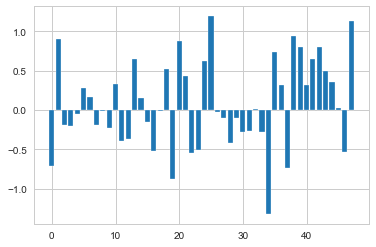

In [192]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()